# GROUP D MACHINE LEARNING PROJECT

Importing the libraries needed to begin our project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Importing our data as df

In [2]:
df = pd.read_csv('power_market(1).csv')

## Data Dictionary
• date: date of the observation ”%Y-%m-%d”
<br>
• hour: hour of the observation, [0 - 23]
<br>
• fc demand: forecast of demand in MWh
<br>
• fc nuclear: forecast of nuclear power production in MWh
<br>
• import FR: forecast of the importing capacity from France to Spain in MWh
<br>
• export FR: forecast of the exporting capacity from Spain to France in MWh
<br>
• fc wind: forecast of wind power production in MWh
<br>
• fc solar pv: forecast of PV solar (solar panels) power production in MWh
<br>
• fc solar th: forecast of thermal solar power production in MWh
<br>
• price: power price for each hour in €/MWh

In [3]:
df.head()

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1
2,21893.0,7117.2,3000.0,2650.0,1823.0,0.0,4.6,51.95,2017-01-01,2
3,20693.0,7117.2,3000.0,2650.0,1777.0,0.0,9.7,47.27,2017-01-01,3
4,19599.0,7117.2,3000.0,2650.0,1746.0,0.0,24.1,45.49,2017-01-01,4


In [4]:
df.count()

fc_demand      32135
fc_nuclear     32135
import_FR      32122
export_FR      32122
fc_wind        32135
fc_solar_pv    32135
fc_solar_th    32135
price          32135
date           32135
hour           32135
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32135 entries, 0 to 32134
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   fc_demand    32135 non-null  float64
 1   fc_nuclear   32135 non-null  float64
 2   import_FR    32122 non-null  float64
 3   export_FR    32122 non-null  float64
 4   fc_wind      32135 non-null  float64
 5   fc_solar_pv  32135 non-null  float64
 6   fc_solar_th  32135 non-null  float64
 7   price        32135 non-null  float64
 8   date         32135 non-null  object 
 9   hour         32135 non-null  int64  
dtypes: float64(8), int64(1), object(1)
memory usage: 2.5+ MB


## 1. Pre-Processing and Exploratory Data Analysis

Looking for null values

In [6]:
df.isnull().sum()/df.count()*100

fc_demand      0.000000
fc_nuclear     0.000000
import_FR      0.040471
export_FR      0.040471
fc_wind        0.000000
fc_solar_pv    0.000000
fc_solar_th    0.000000
price          0.000000
date           0.000000
hour           0.000000
dtype: float64

In [7]:
df[df['import_FR'].isnull()]

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour
840,26030.0,7117.2,NaN,NaN,12401.0,0.0,8.7,35.11,2017-02-05,0
1992,27245.0,7117.2,NaN,NaN,5702.0,0.0,67.0,40.00,2017-03-25,0
4847,28833.0,6105.9,NaN,NaN,3759.0,0.0,589.2,55.00,2017-07-22,0
6863,24622.0,6508.5,NaN,NaN,1901.0,0.0,60.0,64.46,2017-10-14,0
6887,23648.0,6508.5,NaN,NaN,4735.0,0.0,26.3,60.43,2017-10-15,0
10560,27850.0,6071.9,NaN,NaN,9924.0,0.0,41.1,41.71,2018-03-17,0
11303,26404.0,5066.1,NaN,NaN,5190.0,0.0,520.3,44.54,2018-04-17,0
15599,23272.0,7117.2,NaN,NaN,5096.0,0.0,41.1,64.45,2018-10-13,0
15623,23004.0,7117.2,NaN,NaN,9779.0,0.0,148.4,54.47,2018-10-14,0
19464,26352.0,7117.2,NaN,NaN,3177.0,0.0,419.1,55.26,2019-03-23,0


As they account for only 0.08% of the total data we can remove them

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

fc_demand      0
fc_nuclear     0
import_FR      0
export_FR      0
fc_wind        0
fc_solar_pv    0
fc_solar_th    0
price          0
date           0
hour           0
dtype: int64

We will convert the date column **df['date']** into a datetime column for better readability and incase we need to extract time features for further analysis

In [10]:
df['date'] = pd.to_datetime(df['date'])
df.head()

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1
2,21893.0,7117.2,3000.0,2650.0,1823.0,0.0,4.6,51.95,2017-01-01,2
3,20693.0,7117.2,3000.0,2650.0,1777.0,0.0,9.7,47.27,2017-01-01,3
4,19599.0,7117.2,3000.0,2650.0,1746.0,0.0,24.1,45.49,2017-01-01,4


we will now explore each time series independently

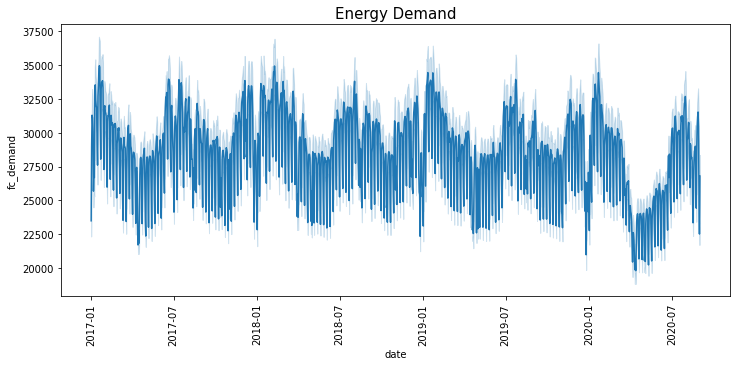

In [11]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['fc_demand'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Energy Demand',fontsize=15)
plt.show();

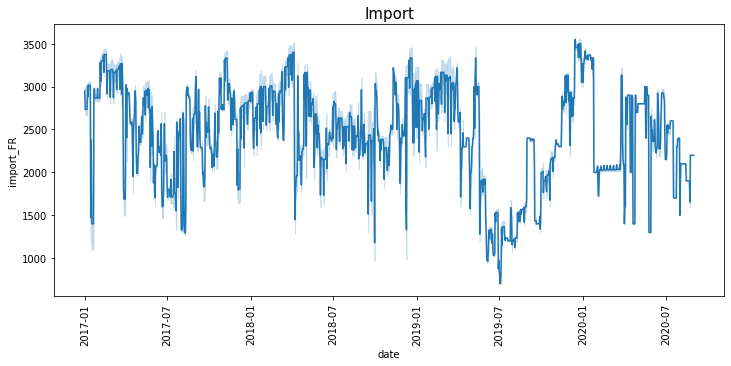

In [12]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['import_FR'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Import',fontsize=15)
plt.show();

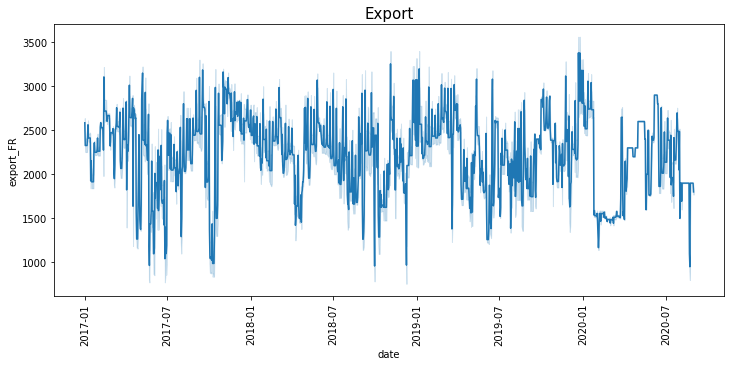

In [13]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['export_FR'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Export',fontsize=15)
plt.show();

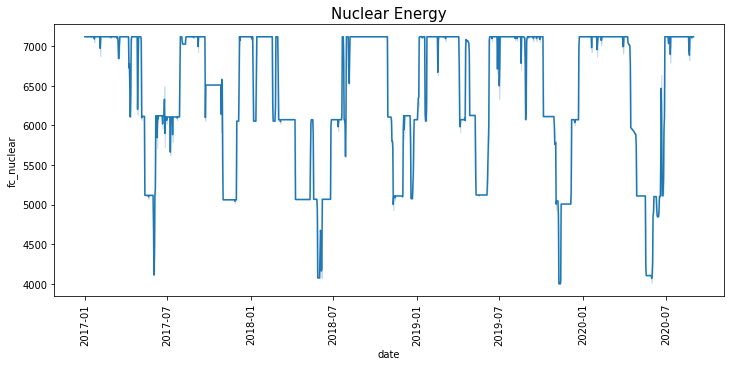

In [14]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['fc_nuclear'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Nuclear Energy',fontsize=15)
plt.show();

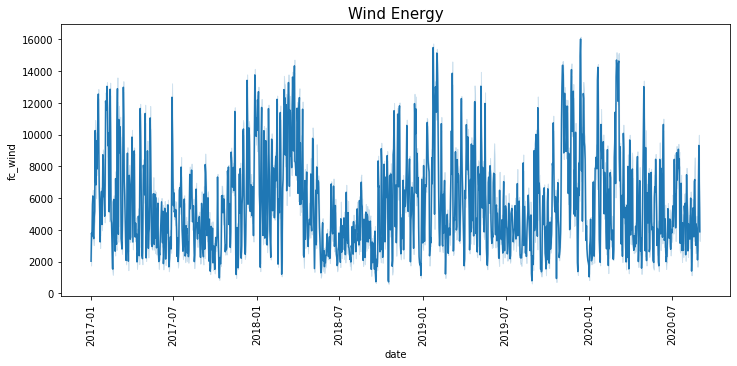

In [15]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['fc_wind'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Wind Energy',fontsize=15)
plt.show();

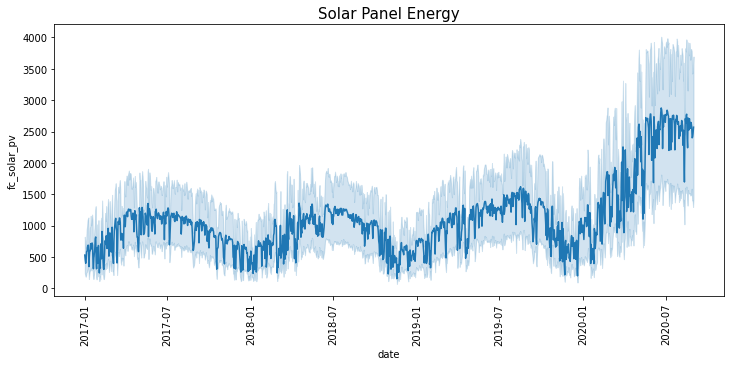

In [16]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['fc_solar_pv'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Solar Panel Energy',fontsize=15)
plt.show();

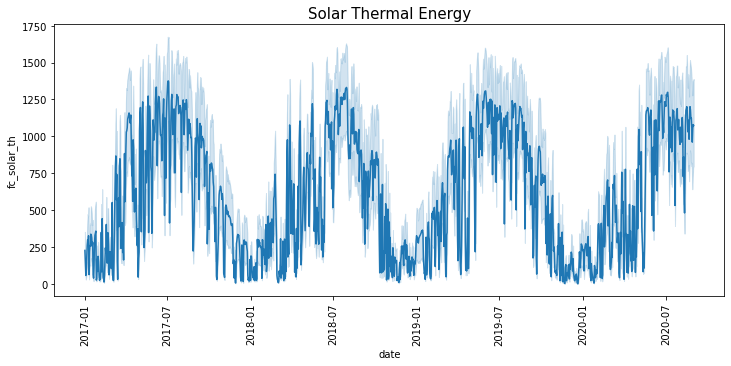

In [17]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df['fc_solar_th'],x=df['date'],data=df)
plt.xticks(rotation=90)
plt.title('Solar Thermal Energy',fontsize=15)
plt.show();

We will now check for outliers across these timeseries

fc_demand


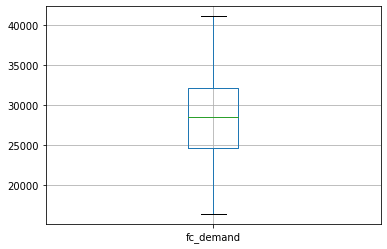

fc_nuclear


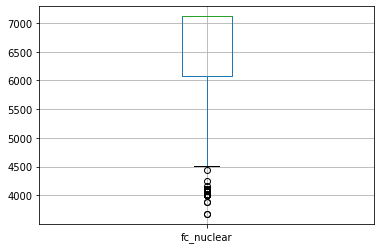

import_FR


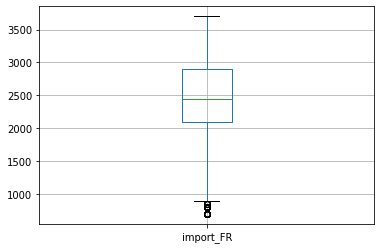

export_FR


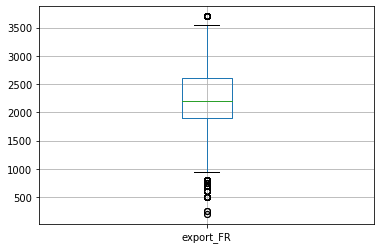

fc_wind


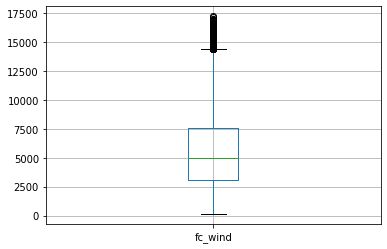

fc_solar_pv


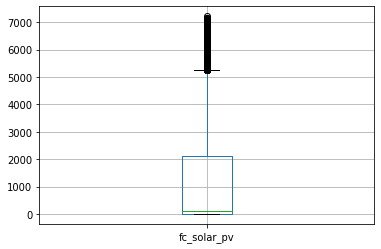

fc_solar_th


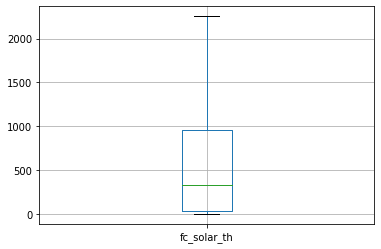

In [18]:
for i in ['fc_demand','fc_nuclear', 'import_FR', 'export_FR', 'fc_wind','fc_solar_pv', 'fc_solar_th']:
    print(i)
    df.boxplot(i)
    plt.show()

We define our low fence and high fence using interquartile range 

In [19]:
#def remove_outlier(df_in, col_name):
 #   q1 = df_in[col_name].quantile(0.25)
  #  q3 = df_in[col_name].quantile(0.75)
   # iqr = q3-q1 #Defining the interquartile range
#    fence_low  = q1-1.5*iqr
 #   fence_high = q3+1.5*iqr
  #  df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
   # print("{} outliers removed".format(len(df_in)-len(df_out)))
    #return df_out

In [20]:
#for columnName in df.columns:
 #   if df[columnName].dtype in ['int64','float64']: # looping if the column type is numeric
  #      print("Analyzing outliers of column: {}".format(columnName))
   #     plt.figure(figsize=(10,10))
    #    df.boxplot([columnName], grid=False, fontsize=15)
     #   df = remove_outlier(df,columnName)
      #  plt.show()
    

even thought it is often advisible to remove outliers, we decide to keep them as quite often in electricity demand we observe spikes during certain periods and there might be information hidden in the outliers that our model can learn from 

**We will extract the following features from the date column to further analyse**
<br>
1.year
<br>
2.month
<br>
3.day
<br>
4.day of the week

In [21]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

In [22]:
df.head()

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour,year,month,day,day_of_week
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0,2017,1,1,6
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1,2017,1,1,6
2,21893.0,7117.2,3000.0,2650.0,1823.0,0.0,4.6,51.95,2017-01-01,2,2017,1,1,6
3,20693.0,7117.2,3000.0,2650.0,1777.0,0.0,9.7,47.27,2017-01-01,3,2017,1,1,6
4,19599.0,7117.2,3000.0,2650.0,1746.0,0.0,24.1,45.49,2017-01-01,4,2017,1,1,6


**We define a time period of 2018-01-01 to 2019-01-01 to reduce noise in order to better observe and analyse any trends in the time series**

In [23]:
df_2018_2019 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2019-01-01') ]

## Energy Demand

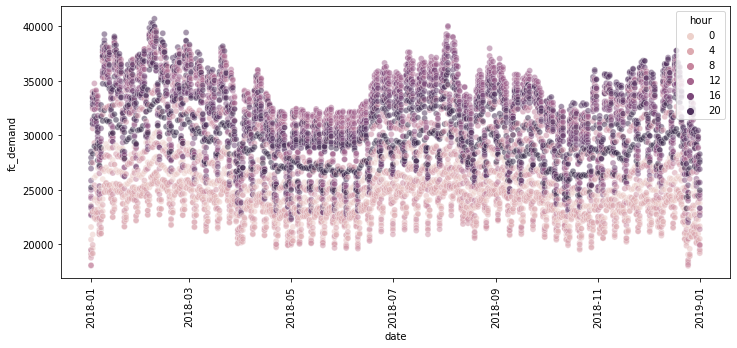

In [24]:
plt.figure(figsize=(12,5))
sns.scatterplot(y=df_2018_2019['fc_demand'],x=df_2018_2019['date'],data=df_2018_2019,hue=df['hour'],alpha=0.5)
plt.xticks(rotation=90);
plt.show()

**Hour**
<br>
After 5 am we see an increase in demand for energy. As we progress through the day, the demand increases with a slight drop in the afternoon (siesta) and bigger drop after 8 pm 

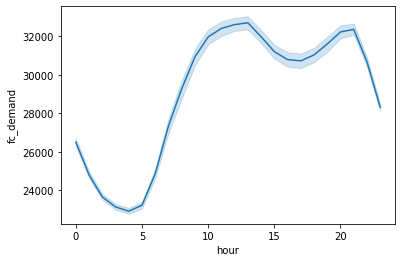

In [25]:
sns.lineplot(x=df_2018_2019['hour'],y=df_2018_2019['fc_demand'],data=df_2018_2019);

**Day of the week**
<br>
The demand decreases as we progress through the week (0 - Monday, 6 - Sunday) with large consuming units such as offices and school are closed during the weekend

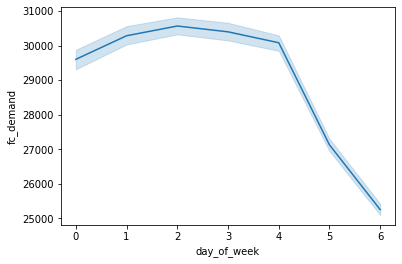

In [26]:
sns.lineplot(x=df_2018_2019['day_of_week'],y=df_2018_2019['fc_demand'],data=df_2018_2019);

**Month**
<br>
Now let's have a look at demand by month

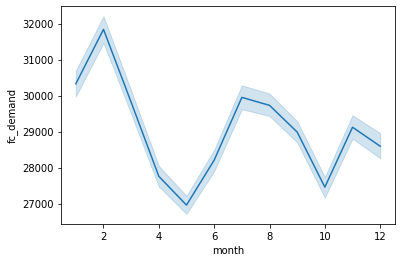

In [27]:
sns.lineplot(x=df_2018_2019['month'],y=df_2018_2019['fc_demand'],data=df_2018_2019);

Let's introduce a season column to understand how much seasonality effects energy demand

In [28]:
def season(x):
    if x == 12 or x == 1 or x == 2:
        return 'Winter'
    elif x == 3 or x == 4 or x == 5:
        return 'Spring'
    elif x == 6 or x == 7 or x== 8:
        return 'Summer'
    else:
        return 'Autumn'
    
df['season'] = df['month'].apply(season)

In [29]:
df.head()

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour,year,month,day,day_of_week,season
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0,2017,1,1,6,Winter
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1,2017,1,1,6,Winter
2,21893.0,7117.2,3000.0,2650.0,1823.0,0.0,4.6,51.95,2017-01-01,2,2017,1,1,6,Winter
3,20693.0,7117.2,3000.0,2650.0,1777.0,0.0,9.7,47.27,2017-01-01,3,2017,1,1,6,Winter
4,19599.0,7117.2,3000.0,2650.0,1746.0,0.0,24.1,45.49,2017-01-01,4,2017,1,1,6,Winter


**Season**
<br>
Energy demand rises during Winter(heating) and Summer(cooling) while we observe a drop as we approach Spring and Autum with better weather conditions

we re-define our time period in order to incorporate season

In [30]:
df_2018_2019 = df[(df['date'] >= '2018-01-01') & (df['date'] <= '2019-01-01') ]

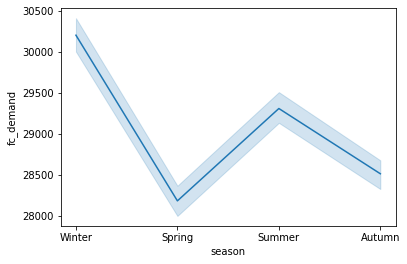

In [31]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['fc_demand'],data=df_2018_2019);

## **Nuclear Energy**

Nuclear follows no seasonal behaviour and hence nuclear energy production tends to follow demand

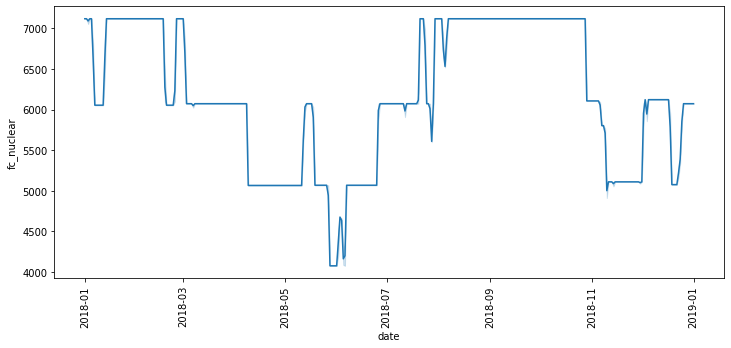

In [32]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df_2018_2019['fc_nuclear'],x=df_2018_2019['date'],data=df_2018_2019)
plt.xticks(rotation=90);
plt.show()

**Season**
<br>

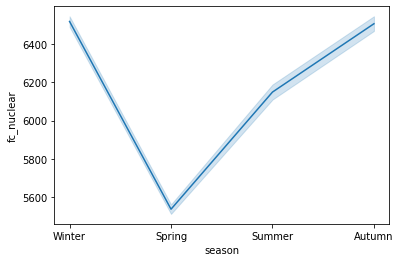

In [33]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['fc_nuclear']);

**Month**

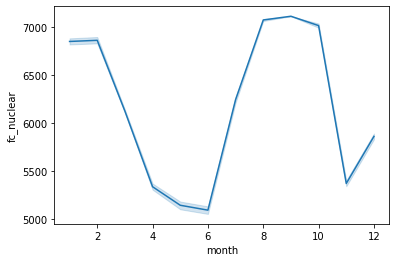

In [34]:
sns.lineplot(x=df_2018_2019['month'],y=df_2018_2019['fc_nuclear']);

**Day of the week**

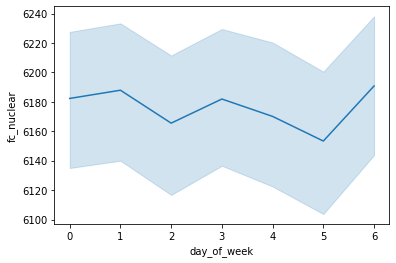

In [35]:
sns.lineplot(x=df_2018_2019['day_of_week'],y=df_2018_2019['fc_nuclear']);

**Hour**

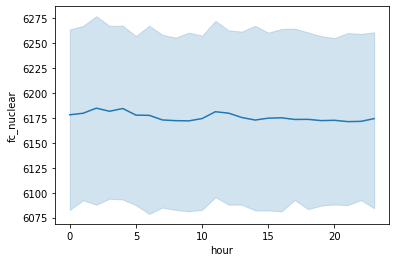

In [36]:
sns.lineplot(x=df_2018_2019['hour'],y=df_2018_2019['fc_nuclear']);

## Solar Panel Energy

Very seasonal in behaviour following the sun
<br>
<br>
**Season** - Production peaking in Spring and Summer with increased exposure of the sun
<br>
<br>
**Hour** - Production highest between 10 AM and 3 PM

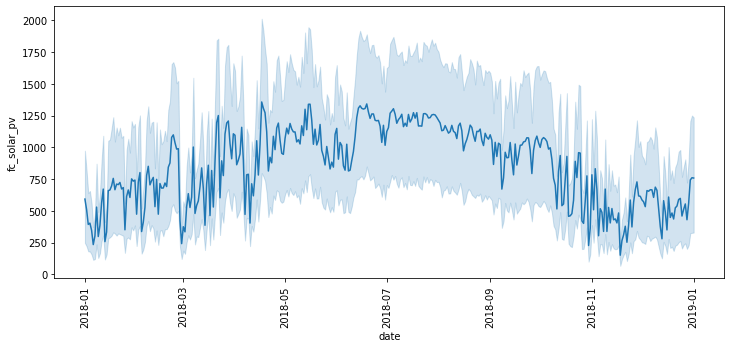

In [37]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df_2018_2019['fc_solar_pv'],x=df_2018_2019['date'],data=df)
plt.xticks(rotation=90);
plt.show()

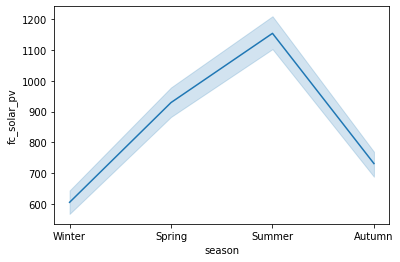

In [38]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['fc_solar_pv']);

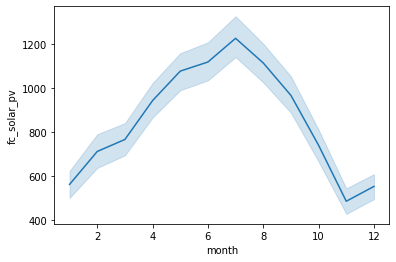

In [39]:
sns.lineplot(x=df_2018_2019['month'],y=df_2018_2019['fc_solar_pv']);

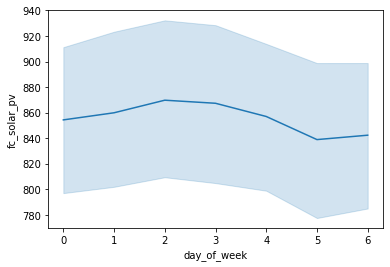

In [40]:
sns.lineplot(x=df_2018_2019['day_of_week'],y=df_2018_2019['fc_solar_pv']);

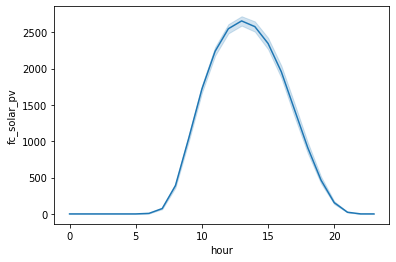

In [41]:
sns.lineplot(x=df_2018_2019['hour'],y=df_2018_2019['fc_solar_pv']);

## Solar Thermal Energy

Similar to solar panels, very seasonal and production following the sun

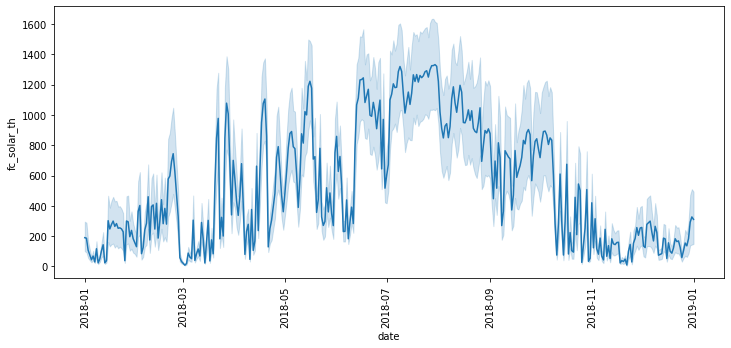

In [42]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df_2018_2019['fc_solar_th'],x=df_2018_2019['date'],data=df_2018_2019)
plt.xticks(rotation=90);
plt.show()

**Season**

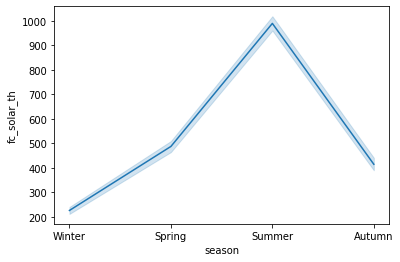

In [43]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['fc_solar_th']);

**Month**

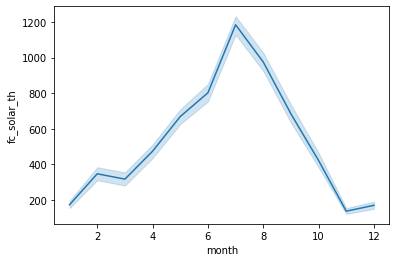

In [44]:
sns.lineplot(x=df_2018_2019['month'],y=df_2018_2019['fc_solar_th']);

**Day of the week**

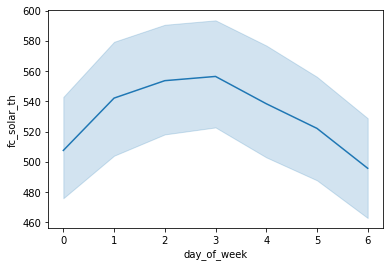

In [45]:
sns.lineplot(x=df_2018_2019['day_of_week'],y=df_2018_2019['fc_solar_th']);

**Hour**

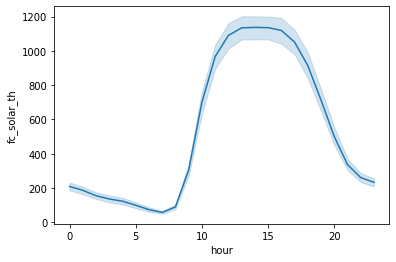

In [46]:
sns.lineplot(x=df_2018_2019['hour'],y=df_2018_2019['fc_solar_th']);

## Wind Energy

Seasonal in behaviour
<br>
<br>
**Season** - Production higher during Winter and Spring with windy weather, decreases as we approach Summer before increasing again during Autum
<br>
<br>
**Hour** - Production decreases as we approach 10 AM and then increases significantly

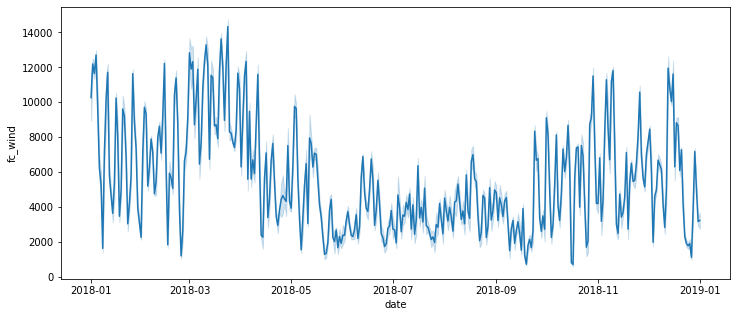

In [47]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df_2018_2019['fc_wind'],x=df_2018_2019['date'],data=df_2018_2019);
plt.show()

**Season**

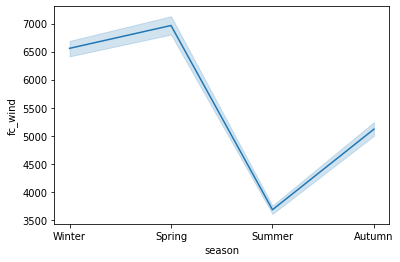

In [48]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['fc_wind']);

**Month**

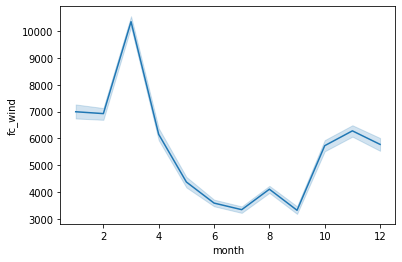

In [49]:
sns.lineplot(x=df_2018_2019['month'],y=df_2018_2019['fc_wind']);

**Day of the week**

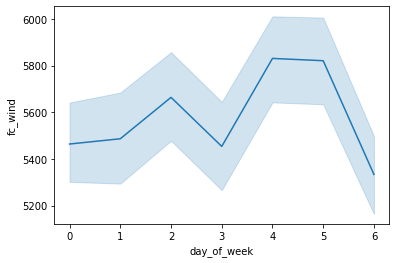

In [50]:
sns.lineplot(x=df_2018_2019['day_of_week'],y=df_2018_2019['fc_wind']);

**Hour**

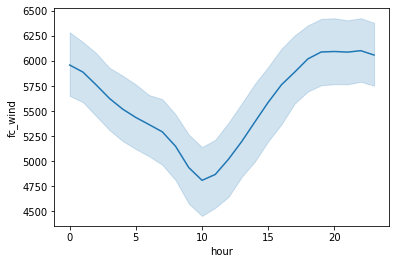

In [51]:
sns.lineplot(x=df_2018_2019['hour'],y=df_2018_2019['fc_wind']);

## Import
<br>
Import seems to peak during the Winter and drop during Summer despite high energy demand. We could infer domestic energy production increases during this period hence reducing the need to import from France 

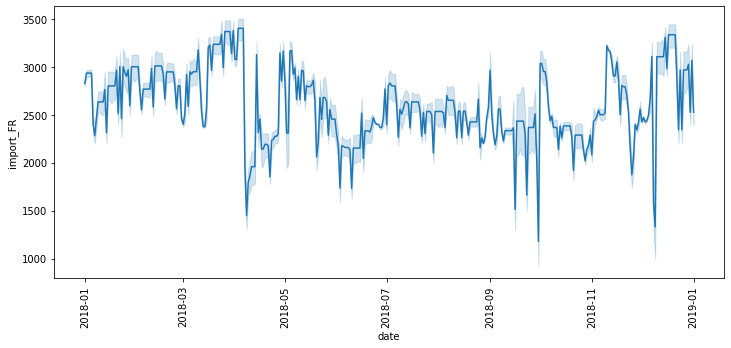

In [52]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df_2018_2019['import_FR'],x=df_2018_2019['date'],data=df_2018_2019)
plt.xticks(rotation=90);
plt.show()

**Season**

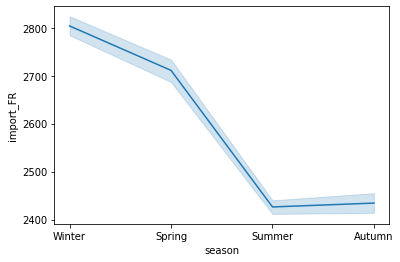

In [53]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['import_FR']);

**Month**

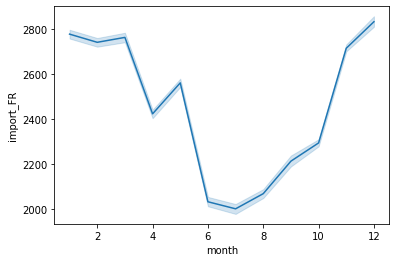

In [54]:
sns.lineplot(x=df['month'],y=df['import_FR']);

## Export

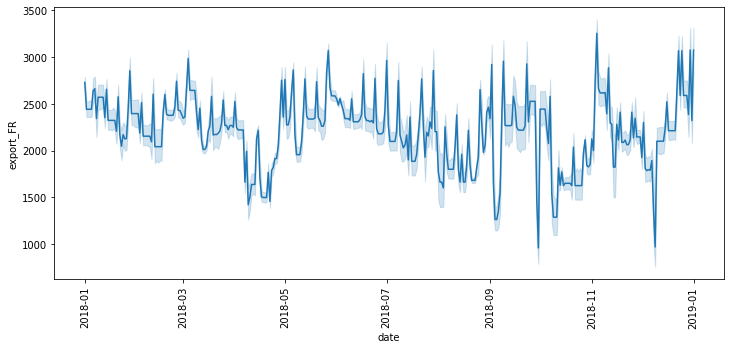

In [55]:
plt.figure(figsize=(12,5))
sns.lineplot(y=df_2018_2019['export_FR'],x=df_2018_2019['date'],data=df_2018_2019)
plt.xticks(rotation=90);
plt.show()

**Season**

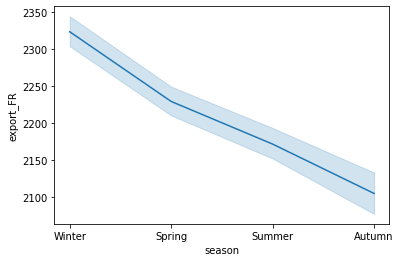

In [56]:
sns.lineplot(x=df_2018_2019['season'],y=df_2018_2019['export_FR']);

**Month**

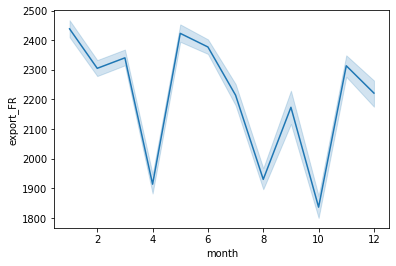

In [57]:
sns.lineplot(x=df_2018_2019['month'],y=df_2018_2019['export_FR']);

## Feature Engineering

### 1. Thermal Gap

Price is heavily affected by demand and supply.  Production of energy through traditional sources of such as coal and gas bear a higher production cost and hence led to an increase in price
<br>
<br>
By substracting demanded from energy provided by renewable sources such nuclear, wind and solar we can infer energy produced by these higher cost bearing sources of energy . This is called **Thermal Gap**


In [58]:
df['total_renewable'] =  (df['fc_nuclear'] + df['fc_solar_pv'] + df['fc_solar_th'] + df['fc_wind'])

In [59]:
df['thermal_gap'] = df['fc_demand'] - df['total_renewable']

More the energy is supplied through the thermal gap, higher is the price since the cost of production is high
<br>
We can reflect this fact by calculating the Thermal/Energy Demand ratio 

In [60]:
df['td_ratio'] = df['thermal_gap']/df['fc_demand']*100

We will also take the difference and absolute difference of thermal gap from total renewable to capture any relationship it might have with price

In [61]:
df['thermal_renewable_dif'] = df['thermal_gap'] - df['total_renewable']
df['thermal_renewable_dif_abs'] = abs(df['thermal_gap'] - df['total_renewable'])

We will introduce the same for import and export

In [62]:
# difference and absolute differnce bewteen import and export
df['import_export_dif'] = df['import_FR'] - df['export_FR']
df['import_export_dif_abs'] = abs(df['import_FR'] - df['export_FR'])

# import and export ratio
df['im_ex_ratio'] = (df['import_FR']/df['export_FR'])*100


# import and demand ratio
df['im_demand_ratio'] = df['import_FR']/df['fc_demand']*100

In [63]:
df.head(2)

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour,...,season,total_renewable,thermal_gap,td_ratio,thermal_renewable_dif,thermal_renewable_dif_abs,import_export_dif,import_export_dif_abs,im_ex_ratio,im_demand_ratio
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0,...,Winter,8854.3,15545.7,63.711885,6691.4,6691.4,400.0,400.0,115.384615,12.295082
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1,...,Winter,8943.8,14672.2,62.128218,5728.4,5728.4,350.0,350.0,113.207547,12.703252


### 2. Peak Period

As observed above earlier, we saw demand peaking and dropping during certain seasons, months, days and hours. We will reflect these peaks my defining and introducing them into our dataset

In [64]:
def season_peak(x):
    if x == 'Winter' or x == 'Summer':
        return 1 #assigning  1 for peak season
    else:
        return 0 #assigning 0 for non peak season
        

In [65]:
def peak_month(x):
    if x in [1,2,6,7,8,9,12]:
        return 1 #assigning 1 for peak month
    else:
        return 0 #assigning 0 for non peak month

In [66]:
def peak_day_of_week(x):
    if x in range(0,5):
        return 1 #assgining 1 for peak day_of_week
    else:
        return 0 #assigning 0 for non peak day_of_week

In [67]:
def peak_hour(x):
    if x in range(8,24):
        return 1 #assigning 1 for peak hour
    else:
        return 0 # assigning 0 for non peak hour

Days leading up to Halloween and then all the way till Janurary we see an increase in demand for energy with Christmas and New Year being major holidays

In [68]:
def festive(x):
    if x in [10,11,12,1]:
        return 1
    else:
        return 0

Introducing them into our dataset

In [69]:
df['peak_season'] = df['season'].apply(season_peak)
df['peak_month'] = df['month'].apply(peak_month)
df['peak_day_of_week'] = df['day_of_week'].apply(peak_day_of_week)
df['peak_hour'] = df['hour'].apply(peak_hour)
df['festive'] = df['month'].apply(festive)

In [70]:
df.head(2)

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour,...,thermal_renewable_dif_abs,import_export_dif,import_export_dif_abs,im_ex_ratio,im_demand_ratio,peak_season,peak_month,peak_day_of_week,peak_hour,festive
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0,...,6691.4,400.0,400.0,115.384615,12.295082,1,1,0,0,1
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1,...,5728.4,350.0,350.0,113.207547,12.703252,1,1,0,0,1


### 3. Year 2020

The year 2020 we observe lockdown and confinment with many schools and offices closed breaking away from the otherwise seasonal behaviour observed

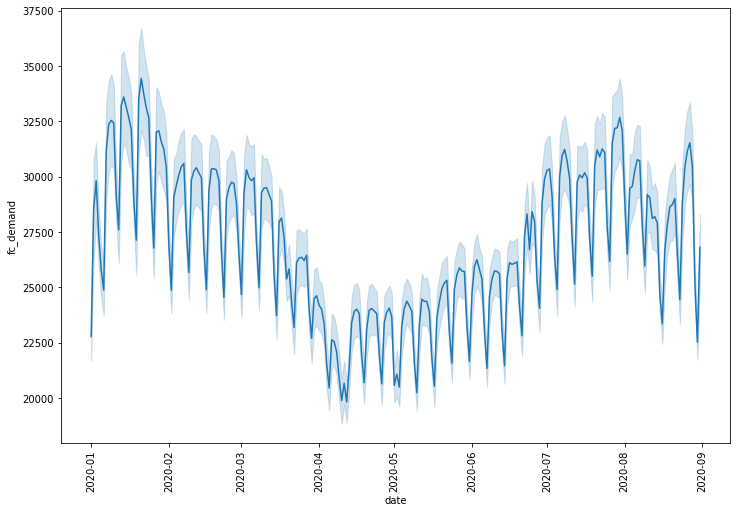

In [71]:
plt.figure(figsize=(12,8))
sns.lineplot(x='date',y='fc_demand',data=df[df['year']==2020])
plt.xticks(rotation=90);

In order to capture this we will introduce a column specifiying whether it was the year 2020 or not

In [72]:
def year_2020(x):
    if x == 2020:
        return 1
    else:
        return 0

During the months of March till June we observed strict lockdown which dropped demand even further down and shall reflect this in our model

In [73]:
df['date'] = df['date'].astype(str)
def lockdown(x):
    if (x >= '2020-03-1') & (x <= '2020-06-30'):
        return 1
    else:
        return 0

In [74]:
df['year_2020'] = df['year'].apply(year_2020)
df['lockdown'] = df['date'].apply(lockdown)
df.head(2)

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,price,date,hour,...,import_export_dif_abs,im_ex_ratio,im_demand_ratio,peak_season,peak_month,peak_day_of_week,peak_hour,festive,year_2020,lockdown
0,24400.0,7117.2,3000.0,2600.0,1732.0,0.0,5.1,58.82,2017-01-01,0,...,400.0,115.384615,12.295082,1,1,0,0,1,0,0
1,23616.0,7117.2,3000.0,2650.0,1826.0,0.0,0.6,58.23,2017-01-01,1,...,350.0,113.207547,12.703252,1,1,0,0,1,0,0


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32122 entries, 0 to 32134
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   fc_demand                  32122 non-null  float64
 1   fc_nuclear                 32122 non-null  float64
 2   import_FR                  32122 non-null  float64
 3   export_FR                  32122 non-null  float64
 4   fc_wind                    32122 non-null  float64
 5   fc_solar_pv                32122 non-null  float64
 6   fc_solar_th                32122 non-null  float64
 7   price                      32122 non-null  float64
 8   date                       32122 non-null  object 
 9   hour                       32122 non-null  int64  
 10  year                       32122 non-null  int64  
 11  month                      32122 non-null  int64  
 12  day                        32122 non-null  int64  
 13  day_of_week                32122 non-null  int

### 4. Demand Lag

In classic ARIMA models, we often calculate price lags defined by **Yt-(Yt-1)**, we shall do the same but for demand to factor in change in demand on an hourly basis *(y=hour)*

In [76]:
index_list = []
demand_lag_list = []
for num in df.index:
    index_list.append(num)
    if index_list[-1] == 0:
        #print(index_list[-1])
        demand_lag_list.append(0)
    else:
        lag = df['fc_demand'][index_list[-1]] - df['fc_demand'][index_list[-2]]
        #print(index_list[-2])
        #print(index_list[-1])
            
        demand_lag_list.append(lag)
        
        

demand_lag = pd.DataFrame(demand_lag_list,columns=['demand_lag(y-yt-1)'])

demand_lag.index = df.index

df = pd.concat([df,demand_lag],axis=1)

we will introduce the same but for thermal_gap

In [77]:
index_list = []
thermal_lag_list = []
for num in df.index:
    index_list.append(num)
    if index_list[-1] == 0:
        #print(index_list[-1])
        thermal_lag_list.append(0)
    else:
        lag = df['thermal_gap'][index_list[-1]] - df['thermal_gap'][index_list[-2]]
        #print(index_list[-2])
        #print(index_list[-1])
            
        thermal_lag_list.append(lag)
        
        

thermal_lag = pd.DataFrame(thermal_lag_list,columns=['thermal_lag(y-yt-1)'])

thermal_lag.index = df.index

df = pd.concat([df,thermal_lag],axis=1)

## Correlation Analysis

Looking feature correlation with price

In [78]:
corr_columns = df.corr() 

In [79]:
corr_columns.loc['price'].sort_values(ascending=False)

price                        1.000000
thermal_gap                  0.696068
td_ratio                     0.622008
thermal_renewable_dif        0.618295
fc_demand                    0.520306
festive                      0.273226
import_export_dif_abs        0.220904
peak_hour                    0.213728
hour                         0.186439
peak_month                   0.167437
peak_day_of_week             0.156640
month                        0.148511
im_ex_ratio                  0.144468
import_export_dif            0.135843
peak_season                  0.112842
demand_lag(y-yt-1)           0.092780
thermal_lag(y-yt-1)          0.079506
import_FR                    0.062271
fc_nuclear                   0.057477
day                          0.033049
fc_solar_th                  0.010488
thermal_renewable_dif_abs   -0.004444
export_FR                   -0.111079
day_of_week                 -0.130764
fc_solar_pv                 -0.131044
fc_wind                     -0.283820
im_demand_ra

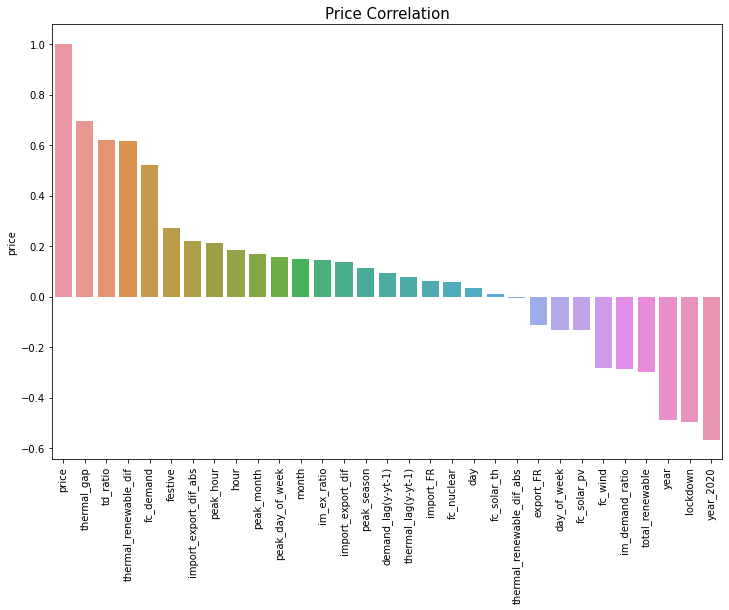

In [80]:
plt.figure(figsize=(12,8))
sns.barplot(x=corr_columns.loc['price'].sort_values(ascending=False).index,y=corr_columns.loc['price'].sort_values(ascending=False))
plt.title('Price Correlation',fontsize=15)
plt.xticks(rotation=90);

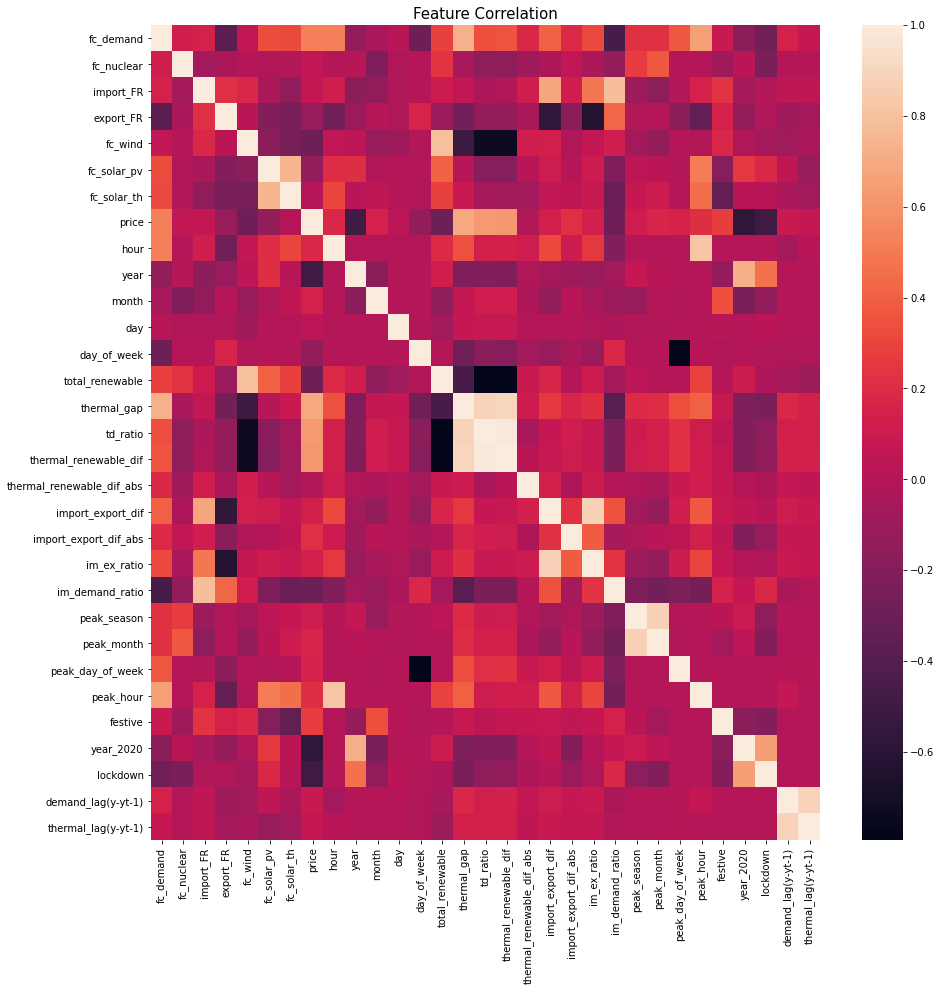

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr())
plt.title('Feature Correlation',fontsize=15);

Highly correlated features

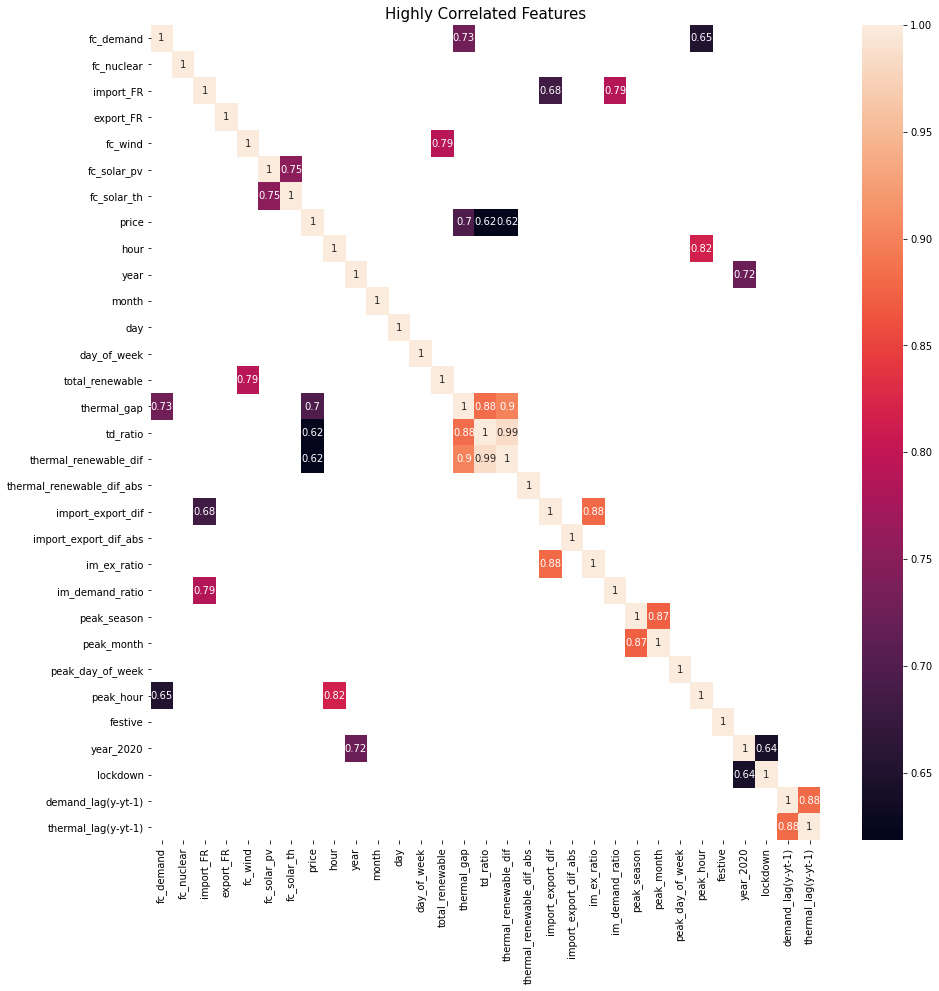

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_columns[corr_columns> 0.6],annot=True)
plt.title('Highly Correlated Features',fontsize=15);

Highly negative correlations

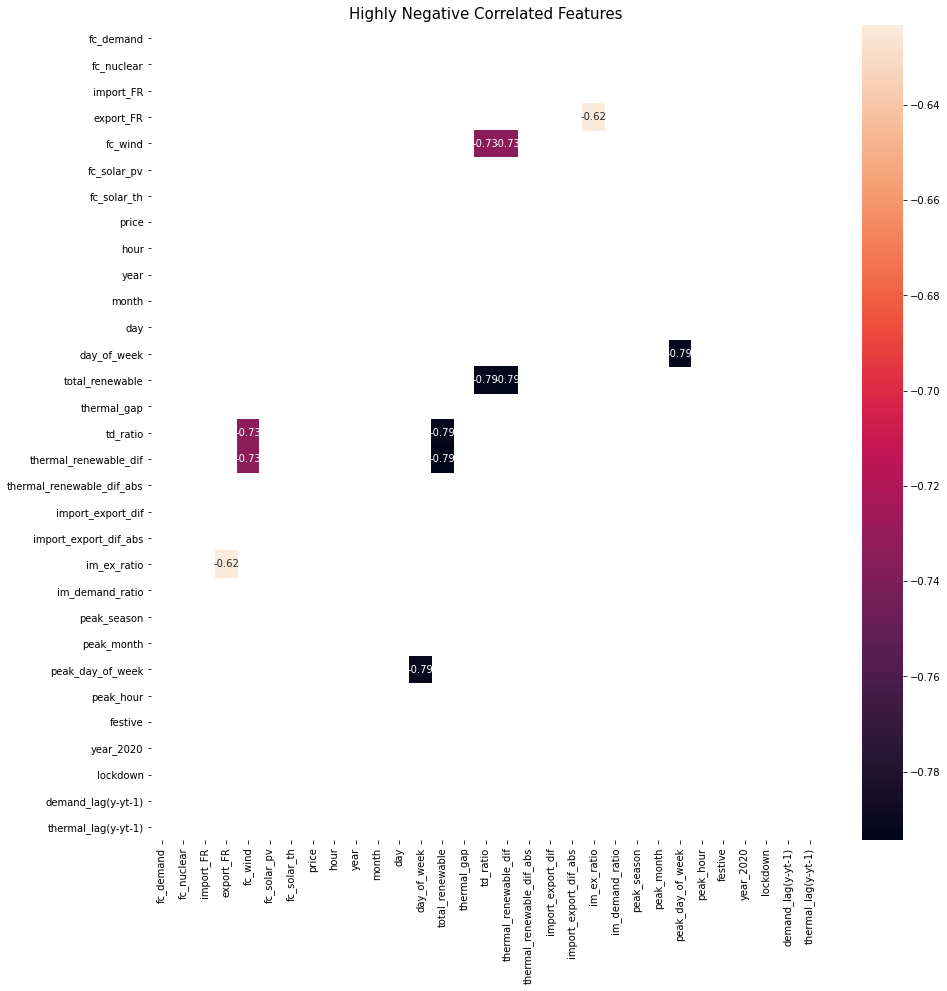

In [83]:
plt.figure(figsize=(15,15))
sns.heatmap(corr_columns[(corr_columns <= -0.6)],annot=True)
plt.title('Highly Negative Correlated Features',fontsize=15);

After observing the above correlations we select the features which will help us predict price while being careful to avoid any 2 or more independent variables being correlated with one another (**multicollinearity**)

Dropping columns

In [84]:
# energy related columns
df.drop('fc_solar_th',axis=1,inplace=True)
df.drop('fc_nuclear',axis=1,inplace=True)
df.drop('fc_solar_pv',axis=1,inplace=True)
df.drop('fc_wind',axis=1,inplace=True)
#df.drop('thermal_gap',axis=1,inplace=True)

#df.drop('total_renewable',axis=1,inplace=True)
df.drop('td_ratio',axis=1,inplace = True)
df.drop('thermal_renewable_dif',axis=1,inplace=True)
df.drop('thermal_renewable_dif_abs',axis=1,inplace=True)
df.drop('thermal_lag(y-yt-1)',axis=1,inplace=True)

# time related columns 
df.drop('year',axis=1,inplace=True)
df.drop('month',axis=1,inplace=True)
df.drop('day',axis=1,inplace=True)
df.drop('day_of_week',axis=1,inplace=True)
df.drop('hour',axis=1,inplace=True)

#df.drop('year_2020',axis=1,inplace=True)
#df.drop('peak_hour',axis=1,inplace=True)
#df.drop('peak_month',axis=1,inplace=True)
#df.drop('peak_day_of_week',axis=1,inplace=True)
df.drop('peak_season',axis=1,inplace=True)

#import export related columns
df.drop('import_FR',axis=1,inplace=True)
df.drop('export_FR',axis=1,inplace=True)
df.drop('import_export_dif',axis=1,inplace=True)
#df.drop('import_export_dif_abs',axis=1,inplace=True)
#df.drop('im_demand_ratio',axis=1,inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32122 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fc_demand              32122 non-null  float64
 1   price                  32122 non-null  float64
 2   date                   32122 non-null  object 
 3   season                 32122 non-null  object 
 4   total_renewable        32122 non-null  float64
 5   thermal_gap            32122 non-null  float64
 6   import_export_dif_abs  32122 non-null  float64
 7   im_ex_ratio            32122 non-null  float64
 8   im_demand_ratio        32122 non-null  float64
 9   peak_month             32122 non-null  int64  
 10  peak_day_of_week       32122 non-null  int64  
 11  peak_hour              32122 non-null  int64  
 12  festive                32122 non-null  int64  
 13  year_2020              32122 non-null  int64  
 14  lockdown               32122 non-null  int64  
 15  de

Certain features such as months may seem continous however are categorical in nature and hence we will convert them into objects to be later **OneHot** encoded using **pandas get.dummies function**

In [86]:
#df['hour'] = df['hour'].astype('object')
#df['year'] = df['year'].astype('object')
#df['month'] = df['month'].astype('object')
#df['day_of_week'] = df['day_of_week'].astype('object')

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32122 entries, 0 to 32134
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fc_demand              32122 non-null  float64
 1   price                  32122 non-null  float64
 2   date                   32122 non-null  object 
 3   season                 32122 non-null  object 
 4   total_renewable        32122 non-null  float64
 5   thermal_gap            32122 non-null  float64
 6   import_export_dif_abs  32122 non-null  float64
 7   im_ex_ratio            32122 non-null  float64
 8   im_demand_ratio        32122 non-null  float64
 9   peak_month             32122 non-null  int64  
 10  peak_day_of_week       32122 non-null  int64  
 11  peak_hour              32122 non-null  int64  
 12  festive                32122 non-null  int64  
 13  year_2020              32122 non-null  int64  
 14  lockdown               32122 non-null  int64  
 15  de

## Train and Test Split

In [88]:
from sklearn.model_selection import train_test_split,TimeSeriesSplit

Given the data is a time series set, we cannot randomly split our data and will explore 2 ways of selecting our train and test set
<br>
<br>
**1. Using train_test_split's shuffle option**
<br>
**2. Using TimeSeriesSplit and defining n_splits** 

we will begin with the sklearn.model_selecton  train_test_split

In [89]:
X = df.drop(['date','price','season'],axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,shuffle=False)

 ### Importing Evaluation Metrics

In [90]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

### Linear Regression Model

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr_model = LinearRegression()

In [94]:
lr_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [95]:
lr_predictions = lr_model.predict(X_test)

lr_MAE = round(mean_absolute_error(y_test,lr_predictions),2)

lr_RMSE = round(np.sqrt(mean_squared_error(y_test,lr_predictions)),2)

lr_ERROR = pd.DataFrame([lr_MAE,lr_RMSE],columns=['Linear Model'],index=['MAE','RMSE'])

lr_ERROR

,Linear Model
MAE,13.03
RMSE,14.84


### LassoCV ,RidgeCV and ElasticCV

In [96]:
from sklearn.linear_model import LassoCV,RidgeCV

**LassoCV Model**

In [97]:
lassoCV_model = LassoCV()

In [98]:
lassoCV_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [99]:
lassoCV_predictions = lassoCV_model.predict(X_test)

lassoCV_MAE = round(mean_absolute_error(y_test,lassoCV_predictions),2)

lassoCV_RMSE = round(np.sqrt(mean_squared_error(y_test,lassoCV_predictions)),2)

lassoCV_ERROR = pd.DataFrame([lassoCV_MAE,lassoCV_RMSE],columns=['LassoCV Model'],index=['MAE','RMSE'])

lassoCV_ERROR

,LassoCV Model
MAE,12.82
RMSE,15.25


**RidgeCV Model**

In [100]:
ridgeCV_model = RidgeCV()

In [101]:
ridgeCV_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [102]:
ridgeCV_predictions = ridgeCV_model.predict(X_test)

ridgeCV_MAE = round(mean_absolute_error(y_test,ridgeCV_predictions),2)

ridgeCV_RMSE = round(np.sqrt(mean_squared_error(y_test,ridgeCV_predictions)),2)

ridgeCV_ERROR = pd.DataFrame([ridgeCV_MAE,ridgeCV_RMSE],columns=['RidgeCV Model'],index=['MAE','RMSE'])

ridgeCV_ERROR

,RidgeCV Model
MAE,13.03
RMSE,14.84


**ElasticCV**

In [103]:
from sklearn.linear_model import ElasticNetCV

In [104]:
elasticCV_model = ElasticNetCV()

In [105]:
elasticCV_model.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
             l1_ratio=0.5, max_iter=1000, n_alphas=100, n_jobs=None,
             normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [106]:
elasticCV_predictions = elasticCV_model.predict(X_test)

elasticCV_MAE = round(mean_absolute_error(y_test,elasticCV_predictions),2)

elasticCV_RMSE = round(np.sqrt(mean_squared_error(y_test,elasticCV_predictions)),2)

elasticCV_ERROR = pd.DataFrame([elasticCV_MAE,elasticCV_RMSE],columns=['ElasticCV Model'],index=['MAE','RMSE'])

elasticCV_ERROR

,ElasticCV Model
MAE,12.82
RMSE,15.25


interesting to observe LassoCV and ElasticCV giving us the same error, even though ElasticNet uses both L1 and L2 regularization, it seems to be relying more on L1 regularization

### Decision Tree Model

In [107]:
from sklearn.tree import DecisionTreeRegressor

In [108]:
tree_model = DecisionTreeRegressor()

In [109]:
tree_model.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [110]:
tree_predictions = tree_model.predict(X_test)

tree_MAE = round(mean_absolute_error(y_test,tree_predictions),2)

tree_RMSE = round(np.sqrt(mean_squared_error(y_test,tree_predictions)),2)

tree_ERROR = pd.DataFrame([tree_MAE,tree_RMSE],columns=['tree Model'],index=['MAE','RMSE'])

tree_ERROR

,tree Model
MAE,13.97
RMSE,17.06


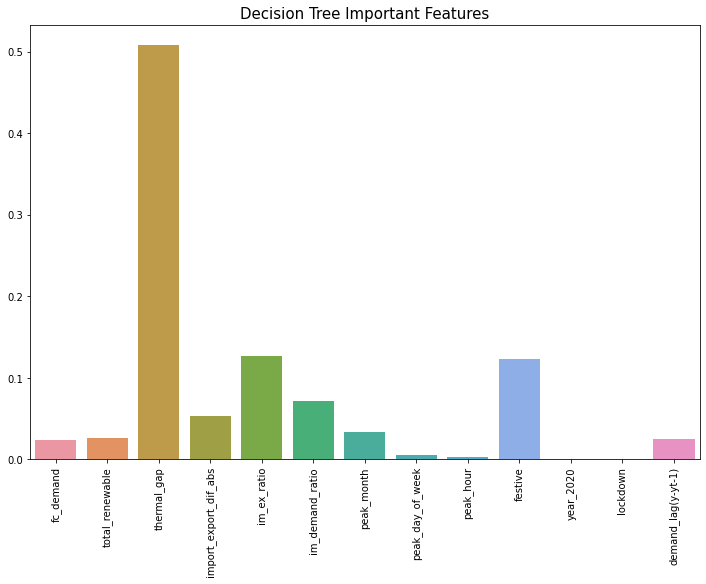

In [111]:
plt.figure(figsize=(12,8))
sns.barplot(x=X.columns,y=tree_model.feature_importances_)
plt.title('Decision Tree Important Features',fontsize=15)
plt.xticks(rotation=90);

### Random Forest Model

In [112]:
from sklearn.ensemble import RandomForestRegressor

In [113]:
rf_model = RandomForestRegressor()

In [114]:
rf_model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [115]:
rf_predictions = rf_model.predict(X_test)

rf_MAE = round(mean_absolute_error(y_test,rf_predictions),2)

rf_RMSE = round(np.sqrt(mean_squared_error(y_test,rf_predictions)),2)

rf_ERROR =  pd.DataFrame([rf_MAE,rf_RMSE],columns=['rf Model'],index=['MAE','RMSE'])

rf_ERROR

,rf Model
MAE,13.13
RMSE,15.56


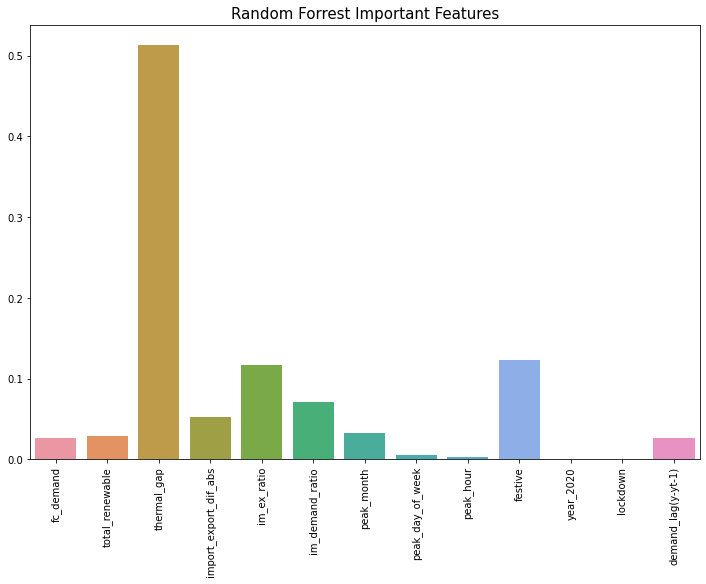

In [116]:
plt.figure(figsize=(12,8))
sns.barplot(x=X.columns,y=rf_model.feature_importances_)
plt.title('Random Forrest Important Features',fontsize=15)
plt.xticks(rotation=90);

In [117]:
shuffle_off = pd.concat([lr_ERROR,lassoCV_ERROR,ridgeCV_ERROR,elasticCV_ERROR,tree_ERROR,rf_ERROR],axis=1)

In [118]:
shuffle_off

,Linear Model,LassoCV Model,RidgeCV Model,ElasticCV Model,tree Model,rf Model
MAE,13.03,12.82,13.03,12.82,13.97,13.13
RMSE,14.84,15.25,14.84,15.25,17.06,15.56


**Key Take Aways**
<br>
<br>

Linear and RidgeCV give the same error indication lambda tends to zero
<br>

A possible reason for what seems to be a high error could be the split of 60-40 for train and test. As we discussed earlier, the year 2020 broke away from the seasonal trends which we would normally observe and our training data set fails to capture this

Further more it would not capture the lockdown period from March 2020 to July 2020
<br>

A possible adjustment for this would be to rework the train-test split with 80-20 or 90-10 and then run our models again **however**, in doing so we would overtrain the model thus achieving low errors but not generalising the model enough



### 2. Using TimeSeriesSplit and defining n_splits

we will now explore sklearn's Time Series Split which will allows us to cross validate on a time series and test our models

we define our **n_splits as 1200**, this allows us to capture time in days and carryout our cross validation to the lowest granular level as possible without splitting it too much


In [119]:
tscv = TimeSeriesSplit(n_splits=1200)
print(tscv)
for train_index, test_index in tscv.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

TimeSeriesSplit(max_train_size=None, n_splits=1200)
TRAIN: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 

TRAIN: [   0    1    2 ... 4819 4820 4821] TEST: [4822 4823 4824 4825 4826 4827 4828 4829 4830 4831 4832 4833 4834 4835
 4836 4837 4838 4839 4840 4841 4842 4843 4844 4845 4846 4847]
TRAIN: [   0    1    2 ... 4845 4846 4847] TEST: [4848 4849 4850 4851 4852 4853 4854 4855 4856 4857 4858 4859 4860 4861
 4862 4863 4864 4865 4866 4867 4868 4869 4870 4871 4872 4873]
TRAIN: [   0    1    2 ... 4871 4872 4873] TEST: [4874 4875 4876 4877 4878 4879 4880 4881 4882 4883 4884 4885 4886 4887
 4888 4889 4890 4891 4892 4893 4894 4895 4896 4897 4898 4899]
TRAIN: [   0    1    2 ... 4897 4898 4899] TEST: [4900 4901 4902 4903 4904 4905 4906 4907 4908 4909 4910 4911 4912 4913
 4914 4915 4916 4917 4918 4919 4920 4921 4922 4923 4924 4925]
TRAIN: [   0    1    2 ... 4923 4924 4925] TEST: [4926 4927 4928 4929 4930 4931 4932 4933 4934 4935 4936 4937 4938 4939
 4940 4941 4942 4943 4944 4945 4946 4947 4948 4949 4950 4951]
TRAIN: [   0    1    2 ... 4949 4950 4951] TEST: [4952 4953 4954 4955 4956 4957 4958 4959 

TRAIN: [   0    1    2 ... 8641 8642 8643] TEST: [8644 8645 8646 8647 8648 8649 8650 8651 8652 8653 8654 8655 8656 8657
 8658 8659 8660 8661 8662 8663 8664 8665 8666 8667 8668 8669]
TRAIN: [   0    1    2 ... 8667 8668 8669] TEST: [8670 8671 8672 8673 8674 8675 8676 8677 8678 8679 8680 8681 8682 8683
 8684 8685 8686 8687 8688 8689 8690 8691 8692 8693 8694 8695]
TRAIN: [   0    1    2 ... 8693 8694 8695] TEST: [8696 8697 8698 8699 8700 8701 8702 8703 8704 8705 8706 8707 8708 8709
 8710 8711 8712 8713 8714 8715 8716 8717 8718 8719 8720 8721]
TRAIN: [   0    1    2 ... 8719 8720 8721] TEST: [8722 8723 8724 8725 8726 8727 8728 8729 8730 8731 8732 8733 8734 8735
 8736 8737 8738 8739 8740 8741 8742 8743 8744 8745 8746 8747]
TRAIN: [   0    1    2 ... 8745 8746 8747] TEST: [8748 8749 8750 8751 8752 8753 8754 8755 8756 8757 8758 8759 8760 8761
 8762 8763 8764 8765 8766 8767 8768 8769 8770 8771 8772 8773]
TRAIN: [   0    1    2 ... 8771 8772 8773] TEST: [8774 8775 8776 8777 8778 8779 8780 8781 

TRAIN: [    0     1     2 ... 11839 11840 11841] TEST: [11842 11843 11844 11845 11846 11847 11848 11849 11850 11851 11852 11853
 11854 11855 11856 11857 11858 11859 11860 11861 11862 11863 11864 11865
 11866 11867]
TRAIN: [    0     1     2 ... 11865 11866 11867] TEST: [11868 11869 11870 11871 11872 11873 11874 11875 11876 11877 11878 11879
 11880 11881 11882 11883 11884 11885 11886 11887 11888 11889 11890 11891
 11892 11893]
TRAIN: [    0     1     2 ... 11891 11892 11893] TEST: [11894 11895 11896 11897 11898 11899 11900 11901 11902 11903 11904 11905
 11906 11907 11908 11909 11910 11911 11912 11913 11914 11915 11916 11917
 11918 11919]
TRAIN: [    0     1     2 ... 11917 11918 11919] TEST: [11920 11921 11922 11923 11924 11925 11926 11927 11928 11929 11930 11931
 11932 11933 11934 11935 11936 11937 11938 11939 11940 11941 11942 11943
 11944 11945]
TRAIN: [    0     1     2 ... 11943 11944 11945] TEST: [11946 11947 11948 11949 11950 11951 11952 11953 11954 11955 11956 11957
 11958 11959

TRAIN: [    0     1     2 ... 14881 14882 14883] TEST: [14884 14885 14886 14887 14888 14889 14890 14891 14892 14893 14894 14895
 14896 14897 14898 14899 14900 14901 14902 14903 14904 14905 14906 14907
 14908 14909]
TRAIN: [    0     1     2 ... 14907 14908 14909] TEST: [14910 14911 14912 14913 14914 14915 14916 14917 14918 14919 14920 14921
 14922 14923 14924 14925 14926 14927 14928 14929 14930 14931 14932 14933
 14934 14935]
TRAIN: [    0     1     2 ... 14933 14934 14935] TEST: [14936 14937 14938 14939 14940 14941 14942 14943 14944 14945 14946 14947
 14948 14949 14950 14951 14952 14953 14954 14955 14956 14957 14958 14959
 14960 14961]
TRAIN: [    0     1     2 ... 14959 14960 14961] TEST: [14962 14963 14964 14965 14966 14967 14968 14969 14970 14971 14972 14973
 14974 14975 14976 14977 14978 14979 14980 14981 14982 14983 14984 14985
 14986 14987]
TRAIN: [    0     1     2 ... 14985 14986 14987] TEST: [14988 14989 14990 14991 14992 14993 14994 14995 14996 14997 14998 14999
 15000 15001

TRAIN: [    0     1     2 ... 17689 17690 17691] TEST: [17692 17693 17694 17695 17696 17697 17698 17699 17700 17701 17702 17703
 17704 17705 17706 17707 17708 17709 17710 17711 17712 17713 17714 17715
 17716 17717]
TRAIN: [    0     1     2 ... 17715 17716 17717] TEST: [17718 17719 17720 17721 17722 17723 17724 17725 17726 17727 17728 17729
 17730 17731 17732 17733 17734 17735 17736 17737 17738 17739 17740 17741
 17742 17743]
TRAIN: [    0     1     2 ... 17741 17742 17743] TEST: [17744 17745 17746 17747 17748 17749 17750 17751 17752 17753 17754 17755
 17756 17757 17758 17759 17760 17761 17762 17763 17764 17765 17766 17767
 17768 17769]
TRAIN: [    0     1     2 ... 17767 17768 17769] TEST: [17770 17771 17772 17773 17774 17775 17776 17777 17778 17779 17780 17781
 17782 17783 17784 17785 17786 17787 17788 17789 17790 17791 17792 17793
 17794 17795]
TRAIN: [    0     1     2 ... 17793 17794 17795] TEST: [17796 17797 17798 17799 17800 17801 17802 17803 17804 17805 17806 17807
 17808 17809

TRAIN: [    0     1     2 ... 20367 20368 20369] TEST: [20370 20371 20372 20373 20374 20375 20376 20377 20378 20379 20380 20381
 20382 20383 20384 20385 20386 20387 20388 20389 20390 20391 20392 20393
 20394 20395]
TRAIN: [    0     1     2 ... 20393 20394 20395] TEST: [20396 20397 20398 20399 20400 20401 20402 20403 20404 20405 20406 20407
 20408 20409 20410 20411 20412 20413 20414 20415 20416 20417 20418 20419
 20420 20421]
TRAIN: [    0     1     2 ... 20419 20420 20421] TEST: [20422 20423 20424 20425 20426 20427 20428 20429 20430 20431 20432 20433
 20434 20435 20436 20437 20438 20439 20440 20441 20442 20443 20444 20445
 20446 20447]
TRAIN: [    0     1     2 ... 20445 20446 20447] TEST: [20448 20449 20450 20451 20452 20453 20454 20455 20456 20457 20458 20459
 20460 20461 20462 20463 20464 20465 20466 20467 20468 20469 20470 20471
 20472 20473]
TRAIN: [    0     1     2 ... 20471 20472 20473] TEST: [20474 20475 20476 20477 20478 20479 20480 20481 20482 20483 20484 20485
 20486 20487

TRAIN: [    0     1     2 ... 22551 22552 22553] TEST: [22554 22555 22556 22557 22558 22559 22560 22561 22562 22563 22564 22565
 22566 22567 22568 22569 22570 22571 22572 22573 22574 22575 22576 22577
 22578 22579]
TRAIN: [    0     1     2 ... 22577 22578 22579] TEST: [22580 22581 22582 22583 22584 22585 22586 22587 22588 22589 22590 22591
 22592 22593 22594 22595 22596 22597 22598 22599 22600 22601 22602 22603
 22604 22605]
TRAIN: [    0     1     2 ... 22603 22604 22605] TEST: [22606 22607 22608 22609 22610 22611 22612 22613 22614 22615 22616 22617
 22618 22619 22620 22621 22622 22623 22624 22625 22626 22627 22628 22629
 22630 22631]
TRAIN: [    0     1     2 ... 22629 22630 22631] TEST: [22632 22633 22634 22635 22636 22637 22638 22639 22640 22641 22642 22643
 22644 22645 22646 22647 22648 22649 22650 22651 22652 22653 22654 22655
 22656 22657]
TRAIN: [    0     1     2 ... 22655 22656 22657] TEST: [22658 22659 22660 22661 22662 22663 22664 22665 22666 22667 22668 22669
 22670 22671

TRAIN: [    0     1     2 ... 24735 24736 24737] TEST: [24738 24739 24740 24741 24742 24743 24744 24745 24746 24747 24748 24749
 24750 24751 24752 24753 24754 24755 24756 24757 24758 24759 24760 24761
 24762 24763]
TRAIN: [    0     1     2 ... 24761 24762 24763] TEST: [24764 24765 24766 24767 24768 24769 24770 24771 24772 24773 24774 24775
 24776 24777 24778 24779 24780 24781 24782 24783 24784 24785 24786 24787
 24788 24789]
TRAIN: [    0     1     2 ... 24787 24788 24789] TEST: [24790 24791 24792 24793 24794 24795 24796 24797 24798 24799 24800 24801
 24802 24803 24804 24805 24806 24807 24808 24809 24810 24811 24812 24813
 24814 24815]
TRAIN: [    0     1     2 ... 24813 24814 24815] TEST: [24816 24817 24818 24819 24820 24821 24822 24823 24824 24825 24826 24827
 24828 24829 24830 24831 24832 24833 24834 24835 24836 24837 24838 24839
 24840 24841]
TRAIN: [    0     1     2 ... 24839 24840 24841] TEST: [24842 24843 24844 24845 24846 24847 24848 24849 24850 24851 24852 24853
 24854 24855

TRAIN: [    0     1     2 ... 26711 26712 26713] TEST: [26714 26715 26716 26717 26718 26719 26720 26721 26722 26723 26724 26725
 26726 26727 26728 26729 26730 26731 26732 26733 26734 26735 26736 26737
 26738 26739]
TRAIN: [    0     1     2 ... 26737 26738 26739] TEST: [26740 26741 26742 26743 26744 26745 26746 26747 26748 26749 26750 26751
 26752 26753 26754 26755 26756 26757 26758 26759 26760 26761 26762 26763
 26764 26765]
TRAIN: [    0     1     2 ... 26763 26764 26765] TEST: [26766 26767 26768 26769 26770 26771 26772 26773 26774 26775 26776 26777
 26778 26779 26780 26781 26782 26783 26784 26785 26786 26787 26788 26789
 26790 26791]
TRAIN: [    0     1     2 ... 26789 26790 26791] TEST: [26792 26793 26794 26795 26796 26797 26798 26799 26800 26801 26802 26803
 26804 26805 26806 26807 26808 26809 26810 26811 26812 26813 26814 26815
 26816 26817]
TRAIN: [    0     1     2 ... 26815 26816 26817] TEST: [26818 26819 26820 26821 26822 26823 26824 26825 26826 26827 26828 26829
 26830 26831

TRAIN: [    0     1     2 ... 28193 28194 28195] TEST: [28196 28197 28198 28199 28200 28201 28202 28203 28204 28205 28206 28207
 28208 28209 28210 28211 28212 28213 28214 28215 28216 28217 28218 28219
 28220 28221]
TRAIN: [    0     1     2 ... 28219 28220 28221] TEST: [28222 28223 28224 28225 28226 28227 28228 28229 28230 28231 28232 28233
 28234 28235 28236 28237 28238 28239 28240 28241 28242 28243 28244 28245
 28246 28247]
TRAIN: [    0     1     2 ... 28245 28246 28247] TEST: [28248 28249 28250 28251 28252 28253 28254 28255 28256 28257 28258 28259
 28260 28261 28262 28263 28264 28265 28266 28267 28268 28269 28270 28271
 28272 28273]
TRAIN: [    0     1     2 ... 28271 28272 28273] TEST: [28274 28275 28276 28277 28278 28279 28280 28281 28282 28283 28284 28285
 28286 28287 28288 28289 28290 28291 28292 28293 28294 28295 28296 28297
 28298 28299]
TRAIN: [    0     1     2 ... 28297 28298 28299] TEST: [28300 28301 28302 28303 28304 28305 28306 28307 28308 28309 28310 28311
 28312 28313

TRAIN: [    0     1     2 ... 30065 30066 30067] TEST: [30068 30069 30070 30071 30072 30073 30074 30075 30076 30077 30078 30079
 30080 30081 30082 30083 30084 30085 30086 30087 30088 30089 30090 30091
 30092 30093]
TRAIN: [    0     1     2 ... 30091 30092 30093] TEST: [30094 30095 30096 30097 30098 30099 30100 30101 30102 30103 30104 30105
 30106 30107 30108 30109 30110 30111 30112 30113 30114 30115 30116 30117
 30118 30119]
TRAIN: [    0     1     2 ... 30117 30118 30119] TEST: [30120 30121 30122 30123 30124 30125 30126 30127 30128 30129 30130 30131
 30132 30133 30134 30135 30136 30137 30138 30139 30140 30141 30142 30143
 30144 30145]
TRAIN: [    0     1     2 ... 30143 30144 30145] TEST: [30146 30147 30148 30149 30150 30151 30152 30153 30154 30155 30156 30157
 30158 30159 30160 30161 30162 30163 30164 30165 30166 30167 30168 30169
 30170 30171]
TRAIN: [    0     1     2 ... 30169 30170 30171] TEST: [30172 30173 30174 30175 30176 30177 30178 30179 30180 30181 30182 30183
 30184 30185

TRAIN: [    0     1     2 ... 31807 31808 31809] TEST: [31810 31811 31812 31813 31814 31815 31816 31817 31818 31819 31820 31821
 31822 31823 31824 31825 31826 31827 31828 31829 31830 31831 31832 31833
 31834 31835]
TRAIN: [    0     1     2 ... 31833 31834 31835] TEST: [31836 31837 31838 31839 31840 31841 31842 31843 31844 31845 31846 31847
 31848 31849 31850 31851 31852 31853 31854 31855 31856 31857 31858 31859
 31860 31861]
TRAIN: [    0     1     2 ... 31859 31860 31861] TEST: [31862 31863 31864 31865 31866 31867 31868 31869 31870 31871 31872 31873
 31874 31875 31876 31877 31878 31879 31880 31881 31882 31883 31884 31885
 31886 31887]
TRAIN: [    0     1     2 ... 31885 31886 31887] TEST: [31888 31889 31890 31891 31892 31893 31894 31895 31896 31897 31898 31899
 31900 31901 31902 31903 31904 31905 31906 31907 31908 31909 31910 31911
 31912 31913]
TRAIN: [    0     1     2 ... 31911 31912 31913] TEST: [31914 31915 31916 31917 31918 31919 31920 31921 31922 31923 31924 31925
 31926 31927

### Linear Regression Model

In [120]:
lr_tscv_model = LinearRegression()

In [121]:
tscv = TimeSeriesSplit(n_splits=1200)
print(tscv)
lr_MAE_list = []
lr_RMSE_list = []
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    #running linear model and storing MAE values
    lr_tscv_model = LinearRegression()
    lr_tscv_model.fit(X_train,y_train)
    lr_tscv_predictions = lr_tscv_model.predict(X_test)
    
    #storing error values
    lr_MAE_list.append(mean_absolute_error(y_test,lr_tscv_predictions))
    lr_RMSE_list.append(np.sqrt(mean_squared_error(y_test,lr_tscv_predictions)))

TimeSeriesSplit(max_train_size=None, n_splits=1200)


In [122]:
lr_tscv_MAE = round(sum(lr_MAE_list)/len(lr_MAE_list),2)

lr_tscv_RMSE = round(sum(lr_RMSE_list)/len(lr_RMSE_list),2)

lr_tscv_ERROR = pd.DataFrame([lr_tscv_MAE,lr_tscv_RMSE],columns=['Linear tscv Model'],index=['MAE','RMSE'])

lr_tscv_ERROR

,Linear tscv Model
MAE,6.17
RMSE,6.83


### LassoCV ,RidgeCV and ElasticCV

**LassoCV Model**

In [123]:
lassoCV_tscv_model = LassoCV(cv=tscv)

In [124]:
lassoCV_tscv_model.fit(X_train,y_train)

LassoCV(alphas=None, copy_X=True,
        cv=TimeSeriesSplit(max_train_size=None, n_splits=1200), eps=0.001,
        fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [125]:
lassoCV_tscv_predictions = lassoCV_tscv_model.predict(X_test)

lassoCV_tscv_MAE = round(mean_absolute_error(y_test,lassoCV_tscv_predictions),2)

lassoCV_tscv_RMSE = round(np.sqrt(mean_squared_error(y_test,lassoCV_tscv_predictions)),2)

lassoCV_tscv_ERROR = pd.DataFrame([lassoCV_tscv_MAE,lassoCV_tscv_RMSE],columns=['LassoCV tscv Model'],index=['MAE','RMSE'])

lassoCV_tscv_ERROR

,LassoCV tscv Model
MAE,2.07
RMSE,2.67


**RidgeCV Model**

In [126]:
ridgeCV_tscv_model = RidgeCV(cv=tscv)

In [127]:
ridgeCV_tscv_model.fit(X_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]),
        cv=TimeSeriesSplit(max_train_size=None, n_splits=1200),
        fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [128]:
ridgeCV_tscv_predictions = ridgeCV_tscv_model.predict(X_test)

ridgeCV_tscv_MAE = round(mean_absolute_error(y_test,ridgeCV_tscv_predictions),2)

ridgeCV_tscv_RMSE = round(np.sqrt(mean_squared_error(y_test,ridgeCV_tscv_predictions)),2)

ridgeCV_tscv_ERROR = pd.DataFrame([ridgeCV_tscv_MAE,ridgeCV_tscv_RMSE],columns=['RidgeCV tscv Model'],index=['MAE','RMSE'])

ridgeCV_tscv_ERROR

,RidgeCV tscv Model
MAE,10.45
RMSE,10.72


**ElasticCV Model**

In [221]:
elasticCV_tscv_model = ElasticNetCV(cv=tscv)

In [222]:
elasticCV_tscv_model.fit(X_train,y_train)

ElasticNetCV(alphas=None, copy_X=True,
             cv=TimeSeriesSplit(max_train_size=None, n_splits=1200), eps=0.001,
             fit_intercept=True, l1_ratio=0.5, max_iter=1000, n_alphas=100,
             n_jobs=None, normalize=False, positive=False, precompute='auto',
             random_state=None, selection='cyclic', tol=0.0001, verbose=0)

In [223]:
elasticCV_tscv_predictions = elasticCV_tscv_model.predict(X_test)

elasticCV_tscv_MAE = round(mean_absolute_error(y_test,elasticCV_tscv_predictions),2)

elasticCV_tscv_RMSE = round(np.sqrt(mean_squared_error(y_test,elasticCV_tscv_predictions)),2)

elasticCV_tscv_ERROR = pd.DataFrame([elasticCV_tscv_MAE,elasticCV_tscv_RMSE],columns=['ElasticCV tscv Model'],index=['MAE','RMSE'])

elasticCV_tscv_ERROR

,ElasticCV tscv Model
MAE,2.07
RMSE,2.67


We see quite a difference between Ridge, Lasso and ElasticNet while Lasso and ELasticNet give us the same error

Lasso method performs both variable selection and regularization in order to enhance the prediction accuracy and interpretability, lets look at the coefficients in order to see which features it penalized and compare with regularization carried out by ElasticNet

In [133]:
lassoCV_tscv_coeff = pd.DataFrame(data=lassoCV_tscv_model.coef_,index=X.columns,columns=['Coeff'])

lassoCV_tscv_coeff = lassoCV_tscv_coeff.sort_values('Coeff',ascending=False)

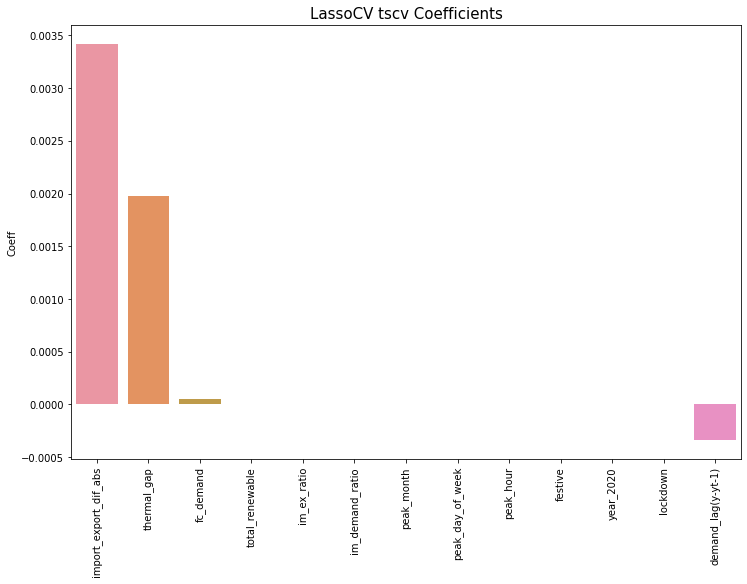

In [134]:
plt.figure(figsize=(12,8))
sns.barplot(x=lassoCV_tscv_coeff.index,y=lassoCV_tscv_coeff.Coeff)
plt.title('LassoCV tscv Coefficients',fontsize=15)
plt.xticks(rotation=90);

In [224]:
elasticCV_tscv_coeff = pd.DataFrame(data=elasticCV_tscv_model.coef_,index=X.columns,columns=['Coeff'])

elasticCV_tscv_coeff = elasticCV_tscv_coeff.sort_values('Coeff',ascending=False)

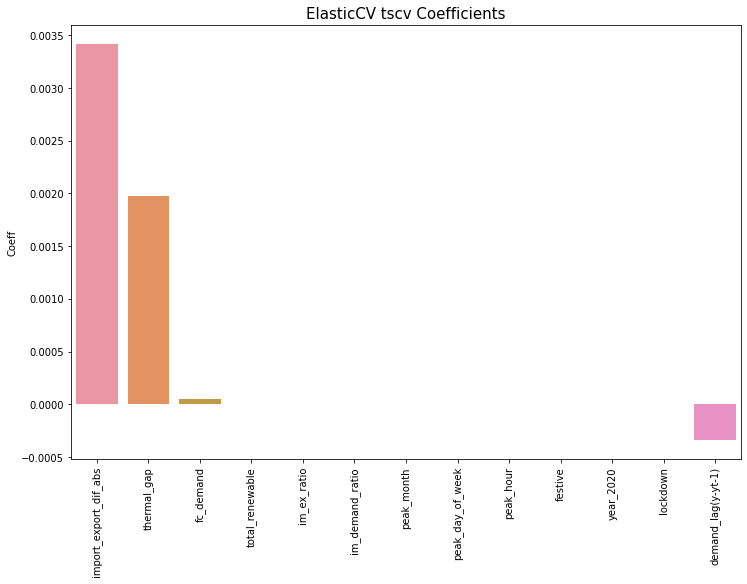

In [225]:
plt.figure(figsize=(12,8))
sns.barplot(x=elasticCV_tscv_coeff.index,y=elasticCV_tscv_coeff.Coeff)
plt.title('ElasticCV tscv Coefficients',fontsize=15)
plt.xticks(rotation=90);

**As expected, ElasticNet is relying on L1 regularization and it has kept the same features as LassoCV -import_export_dif_abs, thermal_gap, fc_wind, demand_lag(yt-(yt-1)) and fc_demand**

**import_export_dif_abs** - We could infer from a large number of imports that it would push the price to be higher 

**thermal_gap** - as discussed earlier, higher the thermal_gap, higher the price

**total_renewable** - as total_renewable increases, it would push the price lower as demand is met by cheaper sources of energy

**demand_lag(yt-yt-1)** - as the number increases it would imply a decrease in demand for energy demanded hence lowering the prices

### Decision Tree Model

In [137]:
tree_tscv_model = DecisionTreeRegressor()

In [138]:
tscv = TimeSeriesSplit(n_splits=1200) #864
print(tscv)
tree_MAE_list = []
tree_RMSE_list = []
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    tree_tscv_model = DecisionTreeRegressor()
    tree_tscv_model.fit(X_train,y_train)
    tree_tscv_predictions = tree_tscv_model.predict(X_test)
    
    #storing error values
    tree_MAE_list.append(mean_absolute_error(y_test,tree_tscv_predictions))
    tree_RMSE_list.append(np.sqrt(mean_squared_error(y_test,tree_tscv_predictions)))

TimeSeriesSplit(max_train_size=None, n_splits=1200)


In [139]:
tree_tscv_MAE = round(sum(tree_MAE_list)/len(tree_MAE_list),2)

tree_tscv_RMSE = round(sum(tree_RMSE_list)/len(tree_RMSE_list),2)

tree_tscv_ERROR = pd.DataFrame([tree_tscv_MAE,tree_tscv_RMSE],columns=['tree tscv Model'],index=['MAE','RMSE'])

tree_tscv_ERROR

,tree tscv Model
MAE,5.54
RMSE,7.07


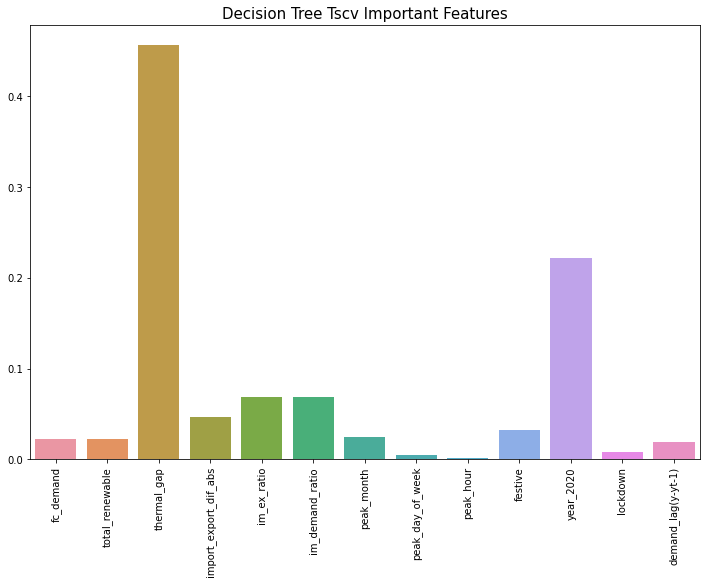

In [140]:
plt.figure(figsize=(12,8))
sns.barplot(x=X.columns,y=tree_tscv_model.feature_importances_)
plt.title('Decision Tree Tscv Important Features',fontsize=15)
plt.xticks(rotation=90);

We begin to see tree based models give higher importance to the **year_2020** which was missing earlier

**Thermal Gap** continues to be the most important feature and hence **root node** of the tree based model

### Random Forest Model

In [141]:
rf_tscv_model = RandomForestRegressor()

In [142]:
tscv = TimeSeriesSplit(n_splits=1200) #864
print(tscv)
rf_MAE_list = []
rf_RMSE_list = []
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    rf_tscv_model = RandomForestRegressor()
    rf_tscv_model.fit(X_train,y_train)
    rf_tscv_predictions = rf_tscv_model.predict(X_test)
    
    #storing error values
    rf_MAE_list.append(mean_absolute_error(y_test,rf_tscv_predictions))
    rf_RMSE_list.append(np.sqrt(mean_squared_error(y_test,rf_tscv_predictions)))

TimeSeriesSplit(max_train_size=None, n_splits=1200)


In [143]:
rf_tscv_MAE = round(sum(rf_MAE_list)/len(rf_MAE_list),2)

rf_tscv_RMSE = round(sum(rf_RMSE_list)/len(rf_RMSE_list),2)

rf_tscv_ERROR =  pd.DataFrame([rf_tscv_MAE,rf_tscv_RMSE],columns=['rf tscv Model'],index=['MAE','RMSE'])

rf_tscv_ERROR

,rf tscv Model
MAE,4.60
RMSE,5.46


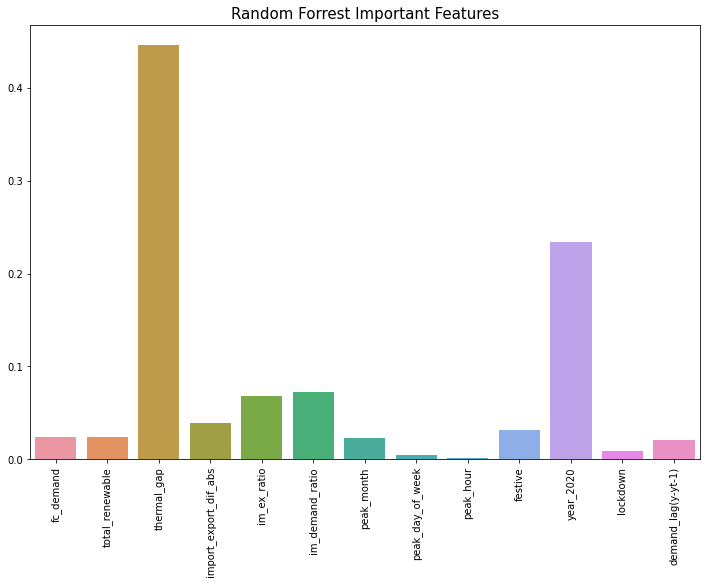

In [144]:
plt.figure(figsize=(12,8))
sns.barplot(x=X.columns,y=rf_tscv_model.feature_importances_)
plt.title('Random Forrest Important Features',fontsize=15)
plt.xticks(rotation=90);

In [145]:
tscv_table = pd.concat([lr_tscv_ERROR,lassoCV_tscv_ERROR,ridgeCV_tscv_ERROR,elasticCV_tscv_ERROR,tree_tscv_ERROR,rf_tscv_ERROR],axis=1)

In [146]:
tscv_table

,Linear tscv Model,LassoCV tscv Model,RidgeCV tscv Model,ElasticCV tscv Model,tree tscv Model,rf tscv Model
MAE,6.17,2.07,10.45,2.07,5.54,4.60
RMSE,6.83,2.67,10.72,2.67,7.07,5.46


**Key Take Aways**
<br>
<br>
LassoCV and ElasticNetCV perform the best with the lowest MAE and RMSE followed by Random Forest and then Linear Regression
<br>
<br>
LassoCV and ElasticNetCV selected only a few features to build it's model in order to predict price
<br>
<br>
We have our top preforming models whose **hyper parameters** we will now tune in order to build the best possible model



## Hyper Parameter Tuning

We begin by importing sklearn's GridSearchCV in order to find the best performing parameters for our models and will score our grid results using the metric **neg_root_mean_squared_error and RMSE**

In [147]:
from sklearn.metrics import SCORERS

In [148]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [149]:
from sklearn.model_selection import GridSearchCV

### LassoCV Grid

*(as lassoCV was not working with GridSearchCV we manually create the grid, we were unable to do the same for Elastic Net)*

we shall consider high alpha values incase aggressive regularization is needed

In [252]:
alphas= [0.001,0.01,0.5,0.05,1,5,10,100,500,1000,1500,2000]

for num in alphas:
    lasso_grid_model = LassoCV(alphas=[num],max_iter=1000000,cv=tscv) #increase max iterations to increase the likelyhood of convergence
    lasso_grid_model.fit(X_train,y_train)
    lasso_grid_prediction = lasso_grid_model.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(y_test,lasso_grid_prediction))
    print(f'{num} RMSE: {RMSE}')

0.001 RMSE: 10.718953304276678
0.01 RMSE: 10.686702924161956
0.5 RMSE: 9.776167823820185
0.05 RMSE: 10.543889037208421
1 RMSE: 7.194215331482265
5 RMSE: 2.6509166733767864
10 RMSE: 2.6541141456777373
100 RMSE: 2.6625592912638862
500 RMSE: 2.6662928057284416
1000 RMSE: 2.7332085638549306
1500 RMSE: 2.756069466815494
2000 RMSE: 2.7824804344385425


At an alpha value of **100** we observe an error rate equal to our default model

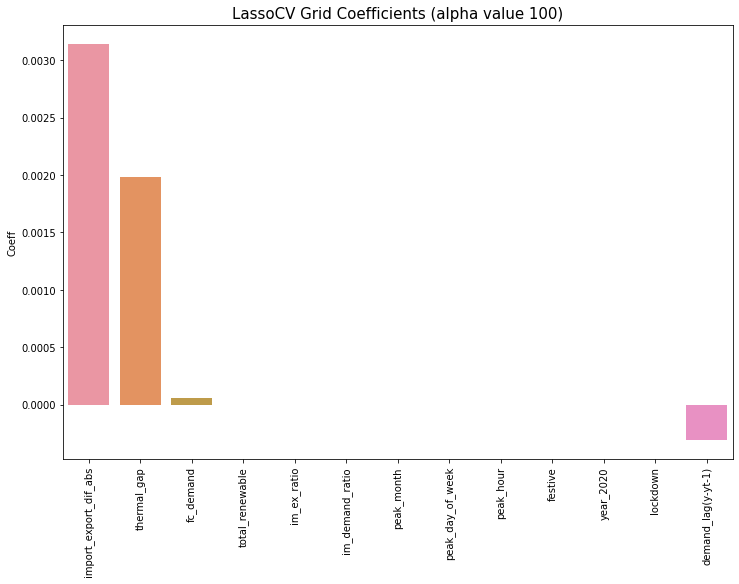

In [254]:
lasso_grid_model = LassoCV(alphas=[100],max_iter=1000000,cv=tscv)
lasso_grid_model.fit(X_train,y_train)

lassoCV_grid_coeff = pd.DataFrame(data=lasso_grid_model.coef_,index=X.columns,columns=['Coeff'])
lassoCV_grid_coeff = lassoCV_grid_coeff.sort_values('Coeff',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=lassoCV_grid_coeff.index,y=lassoCV_grid_coeff.Coeff)
plt.title('LassoCV Grid Coefficients (alpha value 100)',fontsize=15)
plt.xticks(rotation=90);

the model simply looks at thermal gap, import_export_diff in absolute terms, demand and the demand lag wind in order to predict price while foregoing time related features

**Thermal gap** is oberserved to be well correlated with demand(not enought to be excluded from the model in order to avoid multicollinearity) hence an increase in thermal gap would increase demand which would drive the price up

**demand_lag** which we defined earlier is the change in electricity demanded from the pervious day. A decrease in demand from the pervious day would hence result in a drop in price

An interesting result is the consideration of **import_export difference**. The difference is observed to be the highest during peak months, especially winter, and hence an increase in difference would mean more electricity is imported which would increase the price

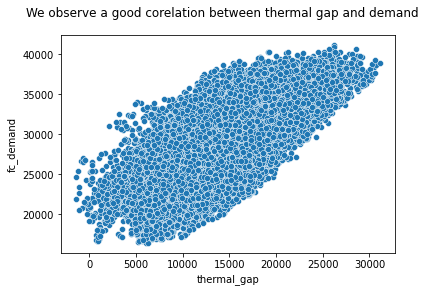

In [195]:
sns.scatterplot(x=df['thermal_gap'],y=df['fc_demand'])
plt.suptitle('We observe a good corelation between thermal gap and demand');

If we decide to further regularize our model we increase our alpha value to 1500 without comprising too much on the error score

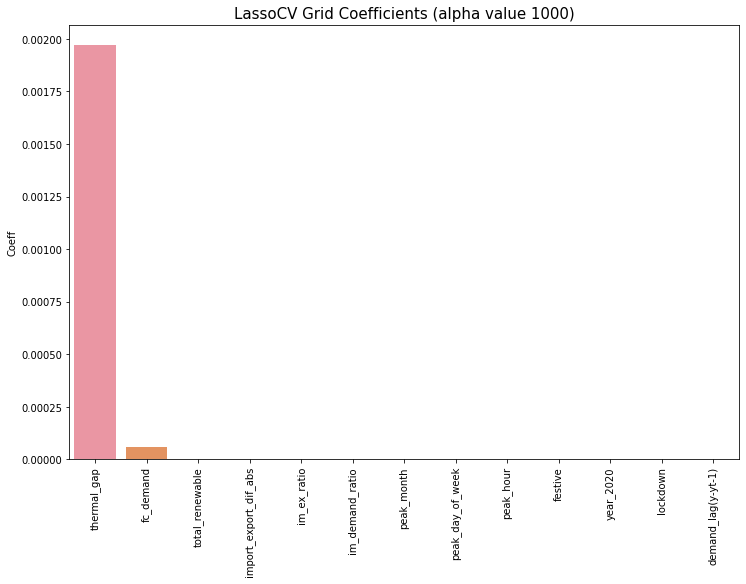

In [255]:
lasso_grid_model = LassoCV(alphas=[1000],max_iter=1000000,cv=tscv)
lasso_grid_model.fit(X_train,y_train)

lassoCV_grid_coeff = pd.DataFrame(data=lasso_grid_model.coef_,index=X.columns,columns=['Coeff'])
lassoCV_grid_coeff = lassoCV_grid_coeff.sort_values('Coeff',ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=lassoCV_grid_coeff.index,y=lassoCV_grid_coeff.Coeff)
plt.title('LassoCV Grid Coefficients (alpha value 1000)',fontsize=15)
plt.xticks(rotation=90);

Consistent with what we see with our tree based models, as we regularize further we observe thermal_gap as our most important feature

### Decision Tree Grid

In [153]:
param_grid = {'max_depth': range(1,30)}

tree_grid_model = GridSearchCV(tree_model,param_grid=param_grid,scoring='neg_root_mean_squared_error',cv=tscv,verbose=2,n_jobs=2)

tree_grid_model.fit(X_train,y_train)
print("Best score found on development set:")
print()
print(tree_grid_model.best_score_)
print("Best parameters set found on development set:")
print()
print(tree_grid_model.best_params_)
print()
print("Grid scores on development set:")
print()
means = tree_grid_model.cv_results_['mean_test_score']
stds = tree_grid_model.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree_grid_model.cv_results_['params']):
    print("Error = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Fitting 1200 folds for each of 29 candidates, totalling 34800 fits


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done 296 tasks      | elapsed:    2.3s
[Parallel(n_jobs=2)]: Done 2992 tasks      | elapsed:   32.0s
[Parallel(n_jobs=2)]: Done 4698 tasks      | elapsed:  1.2min
[Parallel(n_jobs=2)]: Done 5996 tasks      | elapsed:  1.8min
[Parallel(n_jobs=2)]: Done 7910 tasks      | elapsed:  2.7min
[Parallel(n_jobs=2)]: Done 9336 tasks      | elapsed:  3.7min
[Parallel(n_jobs=2)]: Done 11140 tasks      | elapsed:  5.0min
[Parallel(n_jobs=2)]: Done 12960 tasks      | elapsed:  6.5min
[Parallel(n_jobs=2)]: Done 14870 tasks      | elapsed:  8.2min
[Parallel(n_jobs=2)]: Done 16790 tasks      | elapsed: 10.4min
[Parallel(n_jobs=2)]: Done 19200 tasks      | elapsed: 13.0min
[Parallel(n_jobs=2)]: Done 21416 tasks      | elapsed: 15.5min
[Parallel(n_jobs=2)]: Done 23687 tasks      | elapsed: 18.2min
[Parallel(n_jobs=2)]: Done 26174 tasks      | elapsed: 21.4min
[Parallel(n_jobs=2)]: Done 29460 tasks      | elap

Best score found on development set:

-6.502694462837406
Best parameters set found on development set:

{'max_depth': 9}

Grid scores on development set:

Error = -10.610 (+/12.252) for {'max_depth': 1}
Error = -8.844 (+/10.014) for {'max_depth': 2}
Error = -7.780 (+/9.497) for {'max_depth': 3}
Error = -7.190 (+/9.262) for {'max_depth': 4}
Error = -6.810 (+/8.674) for {'max_depth': 5}
Error = -6.658 (+/8.391) for {'max_depth': 6}
Error = -6.551 (+/8.337) for {'max_depth': 7}
Error = -6.516 (+/8.368) for {'max_depth': 8}
Error = -6.503 (+/8.314) for {'max_depth': 9}
Error = -6.616 (+/8.272) for {'max_depth': 10}
Error = -6.681 (+/8.228) for {'max_depth': 11}
Error = -6.720 (+/8.248) for {'max_depth': 12}
Error = -6.825 (+/8.275) for {'max_depth': 13}
Error = -6.858 (+/8.300) for {'max_depth': 14}
Error = -6.895 (+/8.187) for {'max_depth': 15}
Error = -6.948 (+/8.183) for {'max_depth': 16}
Error = -7.020 (+/8.282) for {'max_depth': 17}
Error = -7.028 (+/8.139) for {'max_depth': 18}
Error

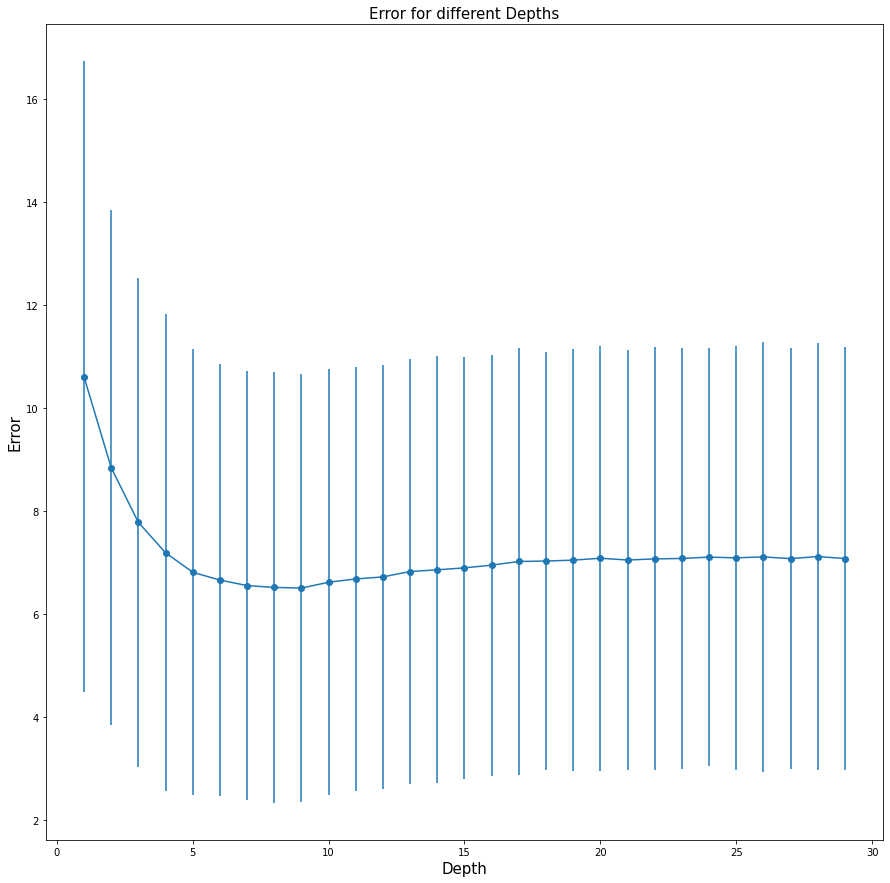

In [154]:
plt.figure(figsize=(15,15))
plt.errorbar(range(1,30), [-m for m in means], yerr=stds, fmt='-o')
plt.title('Error for different Depths', fontsize=15)
plt.xlabel("Depth", fontsize=15)
plt.ylabel("Error", fontsize=15);

We can potenially reduce the depth and hence complexity of our model whithout compromising too much on our error

**tree_grid_model** gives us our best parameter as **depth 9** while we can reduce our **depth to 7** with very little change in error *(+0.02)* and reduce complexity

As a grid search will go through all possible combinations, being computationally heavy so we will run a **Randomize Grid Search** for Random Forest

### Random Forest Grid

In [155]:
from sklearn.model_selection import RandomizedSearchCV

In [174]:
param_grid = { 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
'max_features': ['auto', 'sqrt'],
'min_samples_split': [2, 5, 10],
'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [175]:
tscv = TimeSeriesSplit(n_splits=1200) 
rf_grid_model_1 = RandomizedSearchCV(estimator=rf_model
                                   ,param_distributions=param_grid
                                   ,cv=tscv,verbose=2
                                   ,n_jobs=6
                                   ,scoring='neg_root_mean_squared_error',n_iter=1)

In [176]:
rf_grid_model_1.fit(X_train,y_train)

Fitting 1200 folds for each of 1 candidates, totalling 1200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   11.0s
[Parallel(n_jobs=6)]: Done 150 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 353 tasks      | elapsed:  6.8min
[Parallel(n_jobs=6)]: Done 636 tasks      | elapsed: 21.3min
[Parallel(n_jobs=6)]: Done 1001 tasks      | elapsed: 53.2min
[Parallel(n_jobs=6)]: Done 1200 out of 1200 | elapsed: 77.9min finished


RandomizedSearchCV(cv=TimeSeriesSplit(max_train_size=None, n_splits=1200),
                   error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_lea...
                   iid='deprecate

In [177]:
rf_grid_model_1.best_score_

-5.338537333767612

In [178]:
rf_grid_model_1.best_params_

{'n_estimators': 600,
 'min_samples_split': 10,
 'max_features': 'sqrt',
 'max_depth': 100}

Our grid search is not optimum for a few reasons.

Ideally we would like to run **n_iterations as 10** for a more complete tunning and take into account as many hyper parameter values as possible however, in order to make our time series split for cross validation as granular as possible we end up with a **large n_split value leading to a very computationally heavy grid search**

Even with **n_iterations as just 2 and using a randomize grid search** our grid search ran more **20 hours** before giving us a result

## Conclusion

Our aim from the beginning was to produce a model which not only reduces the RMSE score but also to ensure every feature used is explainable.

We began with the notion that Random Forest would be our best performing model and were surprised to find LassoCV as our best performing model and have predicted our prices using this with a hypertuned alpha value

It was interesting to see that the model disregards features relating to time and learn that no matter the event, whether it being a lockdown or a festive season, these events do not affect price directly but effect demand instead.

Price is a product of demand and the way that demand is satisfied - which in our case is whether it is a higher costing source of electricity or a lower costing source of electricity and our model captures exactly that

## Importing Scoring Sheet

In [256]:
scoring_df = pd.read_csv('scoring(1).csv')

In [257]:
scoring_df.head()

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,date,hour
0,24744.0,7117.2,2300.0,1750.0,2751.0,0.0,627.1,2020-09-01,0
1,23426.0,7117.2,2300.0,2100.0,2452.0,0.0,606.6,2020-09-01,1
2,22597.0,7117.2,2300.0,2100.0,2060.0,0.0,528.3,2020-09-01,2
3,22285.0,7117.2,2300.0,2100.0,1736.0,0.0,598.5,2020-09-01,3
4,22192.0,7117.2,2300.0,2100.0,1322.0,0.0,474.9,2020-09-01,4


In [258]:
scoring_df.isna().sum()

fc_demand      0
fc_nuclear     0
import_FR      0
export_FR      0
fc_wind        0
fc_solar_pv    0
fc_solar_th    0
date           0
hour           0
dtype: int64

We will now carryout the same transformations as we did for the original data set

In [259]:
#converting date column to datetime type
scoring_df['date'] = pd.to_datetime(scoring_df['date'])

#extracting time features
scoring_df['year'] = scoring_df['date'].dt.year
scoring_df['month'] = scoring_df['date'].dt.month
scoring_df['day'] = scoring_df['date'].dt.day
scoring_df['day_of_week'] = scoring_df['date'].dt.dayofweek

In [260]:
#introducing season column
scoring_df['season'] = scoring_df['month'].apply(season)

#total renewable and thermal gap
scoring_df['total_renewable'] =  (scoring_df['fc_nuclear']
                                  + scoring_df['fc_solar_pv']
                                  + scoring_df['fc_solar_th']
                                  + scoring_df['fc_wind'])

scoring_df['thermal_gap'] = scoring_df['fc_demand'] - scoring_df['total_renewable']
scoring_df['td_ratio'] = scoring_df['thermal_gap']/scoring_df['fc_demand']*100
scoring_df['thermal_renewable_dif'] = scoring_df['thermal_gap'] - scoring_df['total_renewable']
scoring_df['thermal_renewable_dif_abs'] = abs(scoring_df['thermal_gap'] - scoring_df['total_renewable'])

#import and export
scoring_df['import_export_dif'] = scoring_df['import_FR'] - scoring_df['export_FR']
scoring_df['import_export_dif_abs'] = abs(scoring_df['import_FR'] - scoring_df['export_FR'])
scoring_df['im_ex_ratio'] = (scoring_df['import_FR']/scoring_df['export_FR'])*100
scoring_df['im_demand_ratio'] = scoring_df['import_FR']/scoring_df['fc_demand']*100

#peak periods
scoring_df['peak_season'] = scoring_df['season'].apply(season_peak)
scoring_df['peak_month'] = scoring_df['month'].apply(peak_month)
scoring_df['peak_day_of_week'] = scoring_df['day_of_week'].apply(peak_day_of_week)
scoring_df['peak_hour'] = scoring_df['hour'].apply(peak_hour)
scoring_df['festive'] = scoring_df['month'].apply(festive)

#year 2020
scoring_df['year_2020'] = scoring_df['year'].apply(year_2020)

#lockdown
scoring_df['date'] = scoring_df['date'].astype(str)
def lockdown(x):
    if (x >= '2020-03-1') & (x <= '2020-06-30'):
        return 1
    else:
        return 0

    
scoring_df['lockdown'] = scoring_df['date'].apply(lockdown)

#demand lag
index_list = []
demand_lag_list = []
for num in scoring_df.index:
    index_list.append(num)
    if index_list[-1] == 0:
        #print(index_list[-1])
        demand_lag_list.append(0)
    else:
        lag = scoring_df['fc_demand'][index_list[-1]] - scoring_df['fc_demand'][index_list[-2]]
        #print(index_list[-2])
        #print(index_list[-1])
            
        demand_lag_list.append(lag)
        
        

demand_lag = pd.DataFrame(demand_lag_list,columns=['demand_lag(y-yt-1)'])

demand_lag.index = scoring_df.index

scoring_df = pd.concat([scoring_df,demand_lag],axis=1)

In [261]:
scoring_df.head(2)

,fc_demand,fc_nuclear,import_FR,export_FR,fc_wind,fc_solar_pv,fc_solar_th,date,hour,year,...,im_ex_ratio,im_demand_ratio,peak_season,peak_month,peak_day_of_week,peak_hour,festive,year_2020,lockdown,demand_lag(y-yt-1)
0,24744.0,7117.2,2300.0,1750.0,2751.0,0.0,627.1,2020-09-01,0,2020,...,131.428571,9.295183,0,1,1,0,0,1,0,0.0
1,23426.0,7117.2,2300.0,2100.0,2452.0,0.0,606.6,2020-09-01,1,2020,...,109.523810,9.818151,0,1,1,0,0,1,0,-1318.0


In [262]:
# energy related columns
scoring_df.drop('fc_solar_th',axis=1,inplace=True)
scoring_df.drop('fc_nuclear',axis=1,inplace=True)
scoring_df.drop('fc_solar_pv',axis=1,inplace=True)
scoring_df.drop('td_ratio',axis=1,inplace = True)
scoring_df.drop('thermal_renewable_dif',axis=1,inplace=True)
scoring_df.drop('thermal_renewable_dif_abs',axis=1,inplace=True)
scoring_df.drop('fc_wind',axis=1,inplace=True)

# time related columns
scoring_df.drop('date',axis=1,inplace=True)
scoring_df.drop('season',axis=1,inplace=True)
scoring_df.drop('year',axis=1,inplace=True)
scoring_df.drop('month',axis=1,inplace=True)
scoring_df.drop('day',axis=1,inplace=True)
scoring_df.drop('day_of_week',axis=1,inplace=True)
scoring_df.drop('hour',axis=1,inplace=True)
scoring_df.drop('peak_season',axis=1,inplace=True)

#import export related columns
scoring_df.drop('import_FR',axis=1,inplace=True)
scoring_df.drop('export_FR',axis=1,inplace=True)
scoring_df.drop('import_export_dif',axis=1,inplace=True)

In [263]:
scoring_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3673 entries, 0 to 3672
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   fc_demand              3673 non-null   float64
 1   total_renewable        3673 non-null   float64
 2   thermal_gap            3673 non-null   float64
 3   import_export_dif_abs  3673 non-null   float64
 4   im_ex_ratio            3673 non-null   float64
 5   im_demand_ratio        3673 non-null   float64
 6   peak_month             3673 non-null   int64  
 7   peak_day_of_week       3673 non-null   int64  
 8   peak_hour              3673 non-null   int64  
 9   festive                3673 non-null   int64  
 10  year_2020              3673 non-null   int64  
 11  lockdown               3673 non-null   int64  
 12  demand_lag(y-yt-1)     3673 non-null   float64
dtypes: float64(7), int64(6)
memory usage: 373.2 KB


Using our model to carryout predictions

**LassoCV(alphas=[100],max_iter=1000000)**

In [274]:
lasso_grid_model_100 = LassoCV(alphas=[100],cv=tscv,max_iter=1000000)
lasso_grid_model_100.fit(X_train,y_train)

LassoCV(alphas=[5], copy_X=True,
        cv=TimeSeriesSplit(max_train_size=None, n_splits=1200), eps=0.001,
        fit_intercept=True, max_iter=1000000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [275]:
scoring_grid_prediction = lasso_grid_model_100.predict(scoring_df)

In [276]:
scoring_date = pd.read_csv('scoring(1).csv')
predictions_file = pd.DataFrame([scoring_date['date'],scoring_grid_prediction]).transpose()

In [277]:
predictions_file.columns =['date','price']

In [278]:
predictions_file.to_csv(r'C:\Users\Sumant Duggal\Downloads\ML2\predictions_groupD_100.csv',index=False)

## Annex

In [91]:
from xgboost import XGBRegressor

In [93]:
tscv = TimeSeriesSplit(n_splits=1200) #864
print(tscv)
xgb_MAE_list = []
xgb_RMSE_list = []
for train_index, test_index in tscv.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    
    xgb_tscv_model = XGBRegressor()
    xgb_tscv_model.fit(X_train,y_train)
    xgb_tscv_predictions = xgb_tscv_model.predict(X_test)
    
    #storing error values
    xgb_MAE_list.append(mean_absolute_error(y_test,xgb_tscv_predictions))
    xgb_RMSE_list.append(np.sqrt(mean_squared_error(y_test,xgb_tscv_predictions)))

TimeSeriesSplit(max_train_size=None, n_splits=1200)


In [94]:
xgb_tscv_MAE = round(sum(xgb_MAE_list)/len(xgb_MAE_list),2)

xgb_tscv_RMSE = round(sum(xgb_RMSE_list)/len(xgb_RMSE_list),2)

xgb_tscv_ERROR =  pd.DataFrame([xgb_tscv_MAE,xgb_tscv_RMSE],columns=['xgb tscv Model'],index=['MAE','RMSE'])

xgb_tscv_ERROR

,xgb tscv Model
MAE,4.47
RMSE,5.32
